# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style='whitegrid')

import warnings

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 12
%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

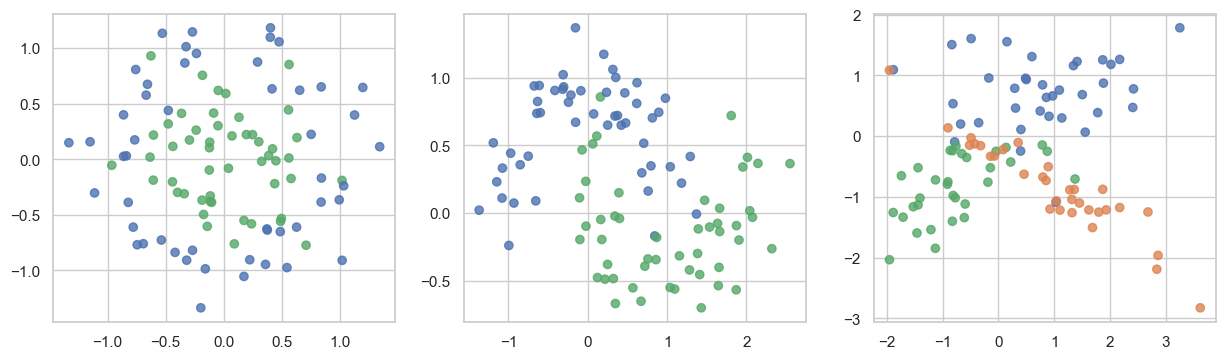

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y, ax=None):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if ax is None:
        cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                    edgecolors=np.array(palette)[y], linewidths=2)
    else:
        cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                   edgecolors=np.array(palette)[y], linewidths=2)

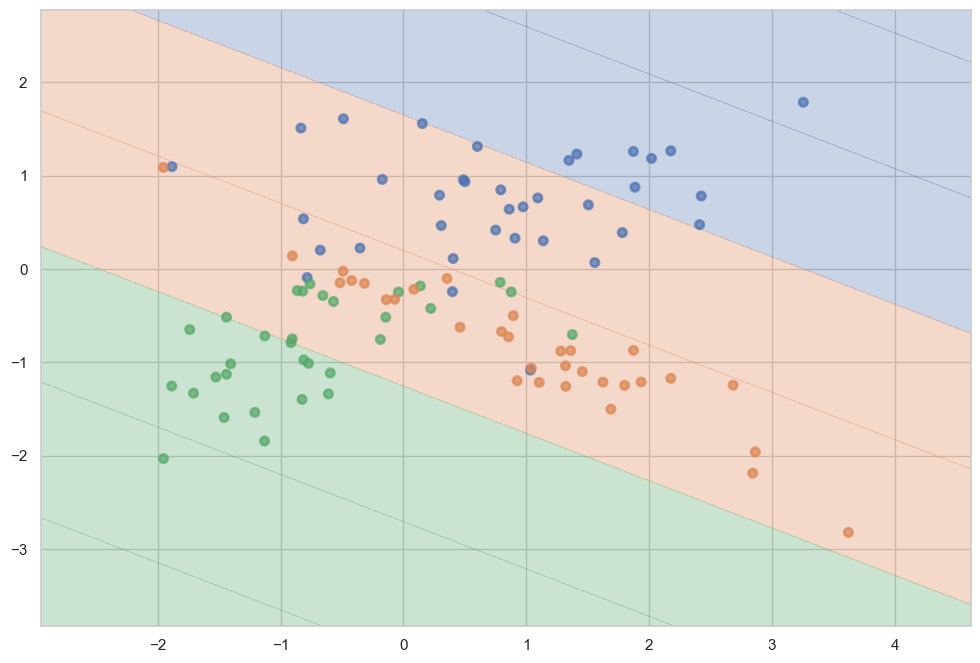

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

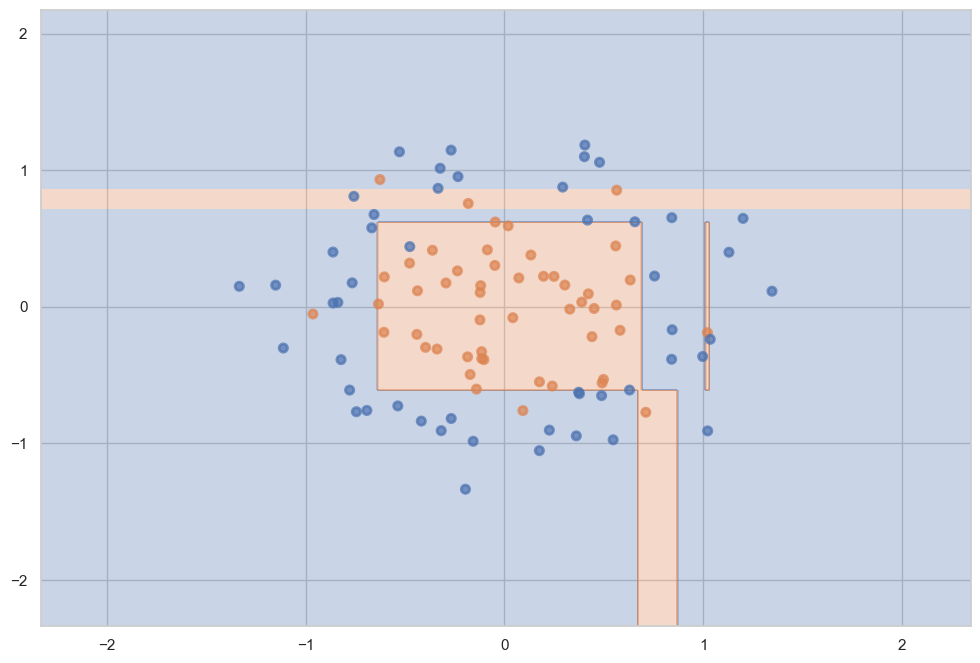

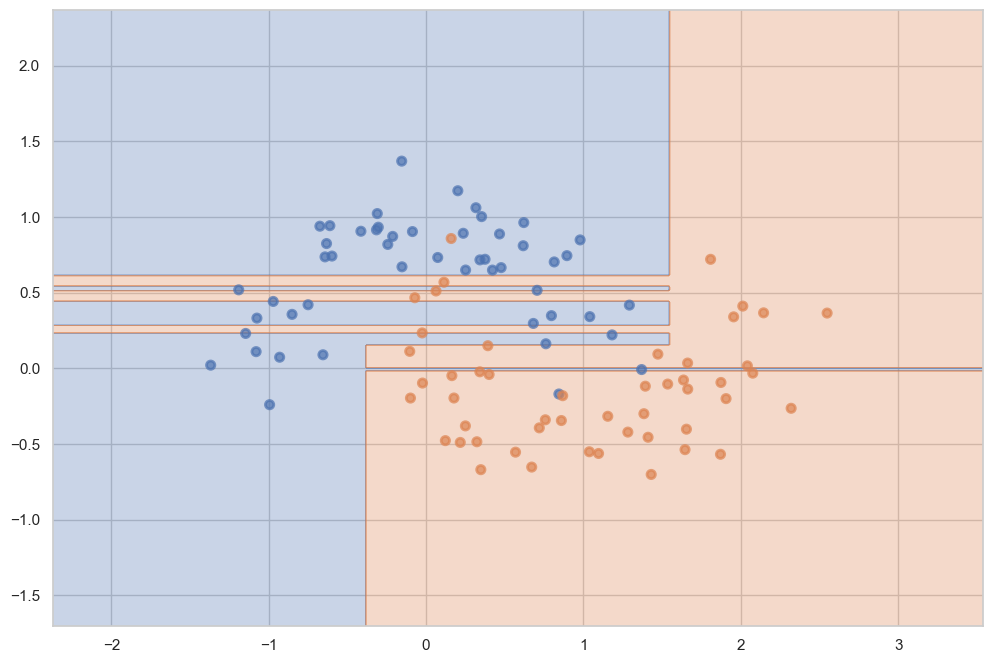

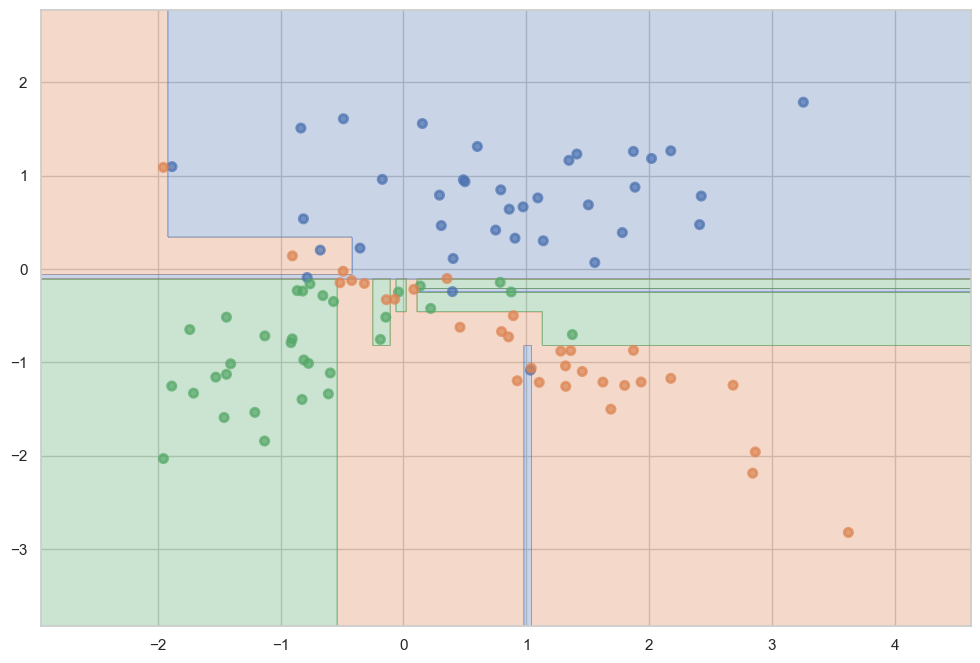

In [7]:
np.random.seed(423)
for ds in datasets:
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    plot_surface(clf, X, y)
    plt.show()

__Ответ:__ Деревья сильно переобучились. Это видно по отдельным тонким линиям, которые захватывают 1-2 объекта

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [8]:
def fit_plot_trees(clf, scoring, X, y, ax=None):
    np.random.seed(432)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=432)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score_train = scoring(y_train, clf.predict(X_train))

    score_test = scoring(y_test, y_pred)
    plot_surface(clf, X, y, ax)

    return score_train, score_test

Напишием генератор для удобного доступа к перебору параметров

In [9]:
import itertools

params = {
    'max_depth': [2, 32, 128],
    'min_samples_leaf': [2, 32, 128]
}


def generate_params_dicts(params):
    for v in itertools.product(*params.values()):
        cur_params_set = {}
        for idx, k in enumerate(params.keys()):
            cur_params_set[k] = v[idx]
        yield cur_params_set


for p in generate_params_dicts(params):
    print(p)

{'max_depth': 2, 'min_samples_leaf': 2}
{'max_depth': 2, 'min_samples_leaf': 32}
{'max_depth': 2, 'min_samples_leaf': 128}
{'max_depth': 32, 'min_samples_leaf': 2}
{'max_depth': 32, 'min_samples_leaf': 32}
{'max_depth': 32, 'min_samples_leaf': 128}
{'max_depth': 128, 'min_samples_leaf': 2}
{'max_depth': 128, 'min_samples_leaf': 32}
{'max_depth': 128, 'min_samples_leaf': 128}


{'max_depth': 1, 'min_samples_leaf': 1}
Accuracy train: 0.65
Accuracy test: 0.7

--------------------


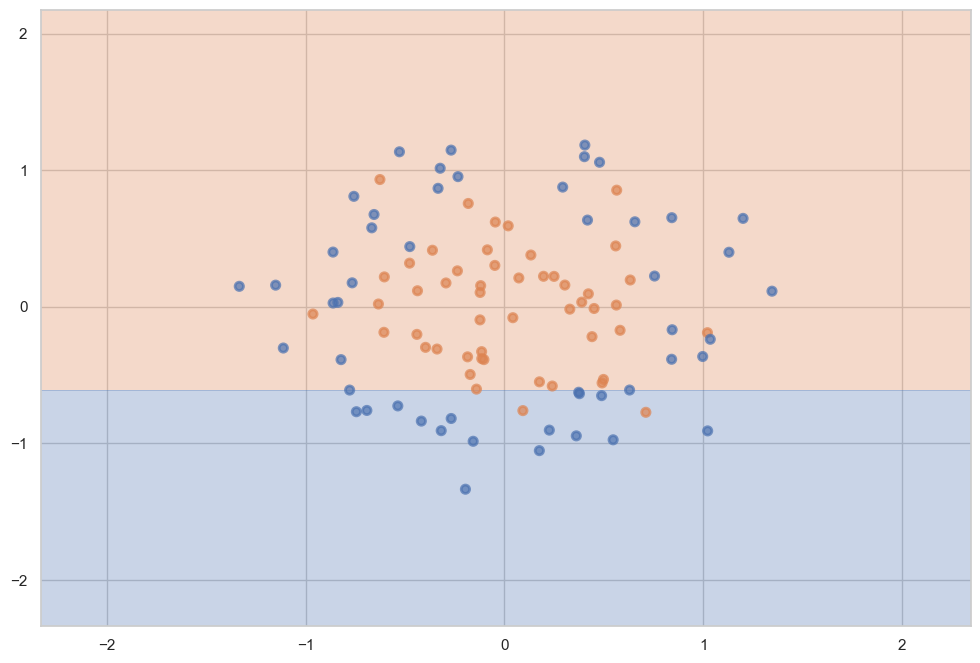

{'max_depth': 1, 'min_samples_leaf': 4}
Accuracy train: 0.65
Accuracy test: 0.7

--------------------


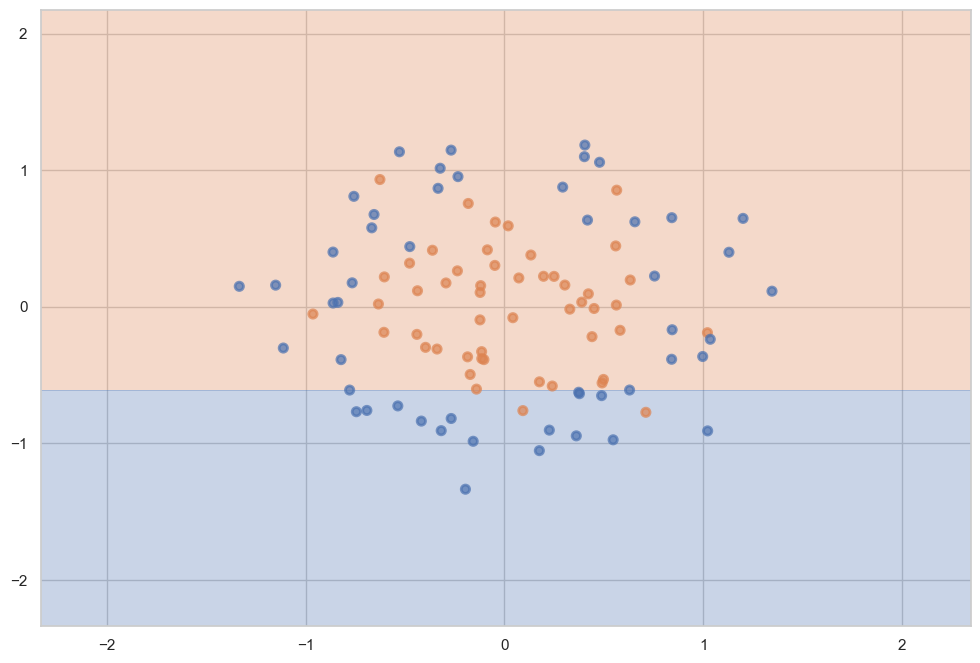

{'max_depth': 1, 'min_samples_leaf': 12}
Accuracy train: 0.65
Accuracy test: 0.7

--------------------


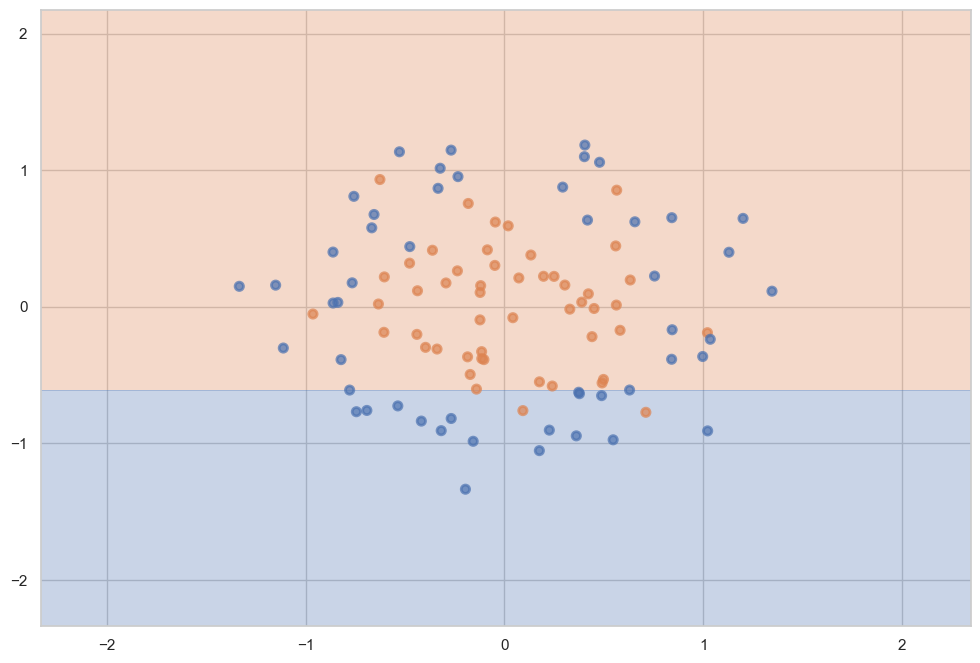

{'max_depth': 1, 'min_samples_leaf': 32}
Accuracy train: 0.5875
Accuracy test: 0.7

--------------------


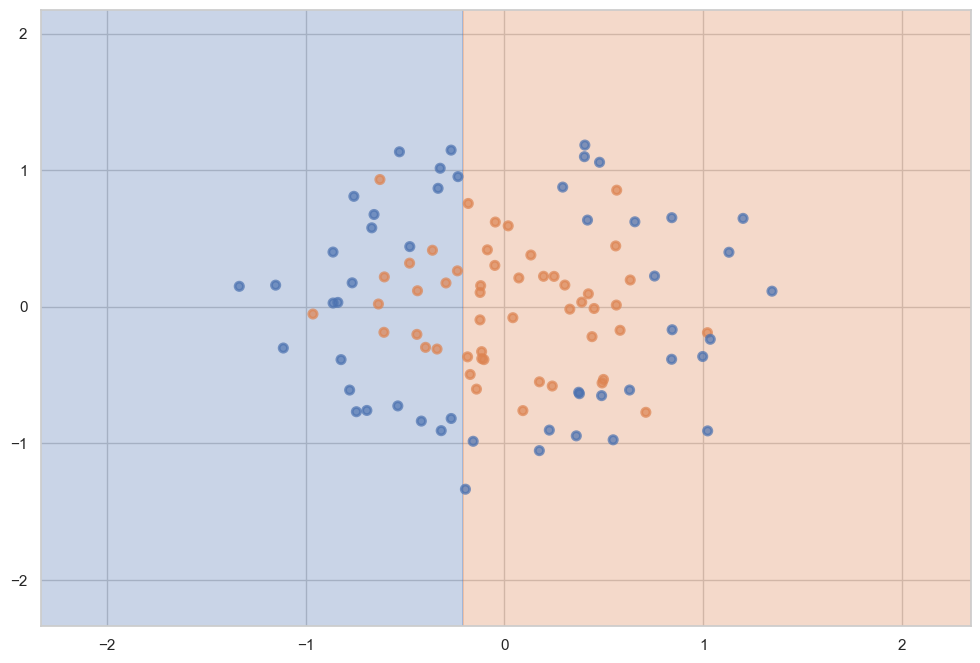

{'max_depth': 4, 'min_samples_leaf': 1}
Accuracy train: 0.975
Accuracy test: 0.75

--------------------


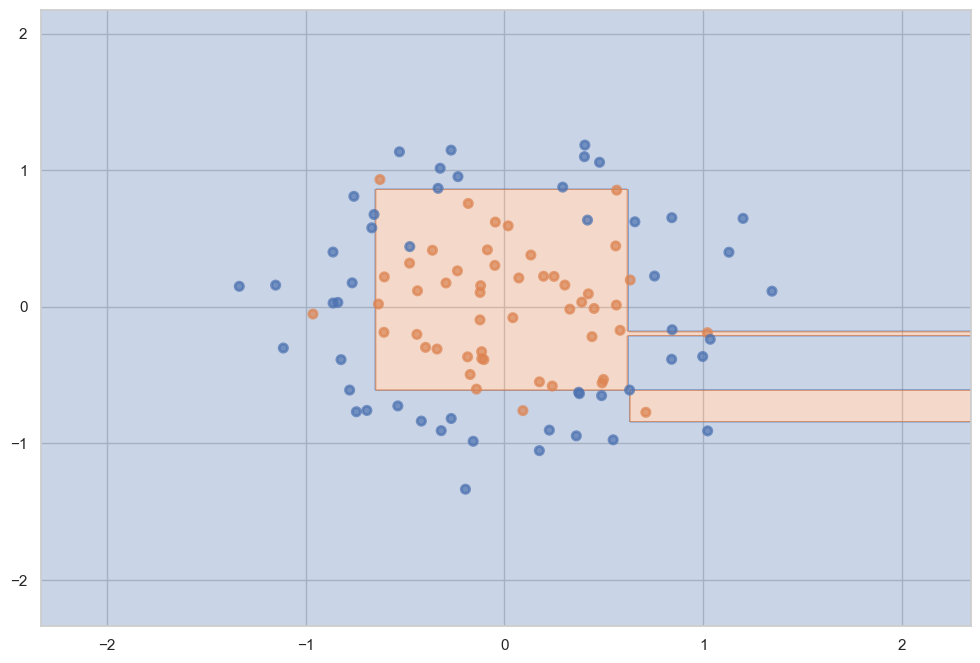

{'max_depth': 4, 'min_samples_leaf': 4}
Accuracy train: 0.95
Accuracy test: 0.8

--------------------


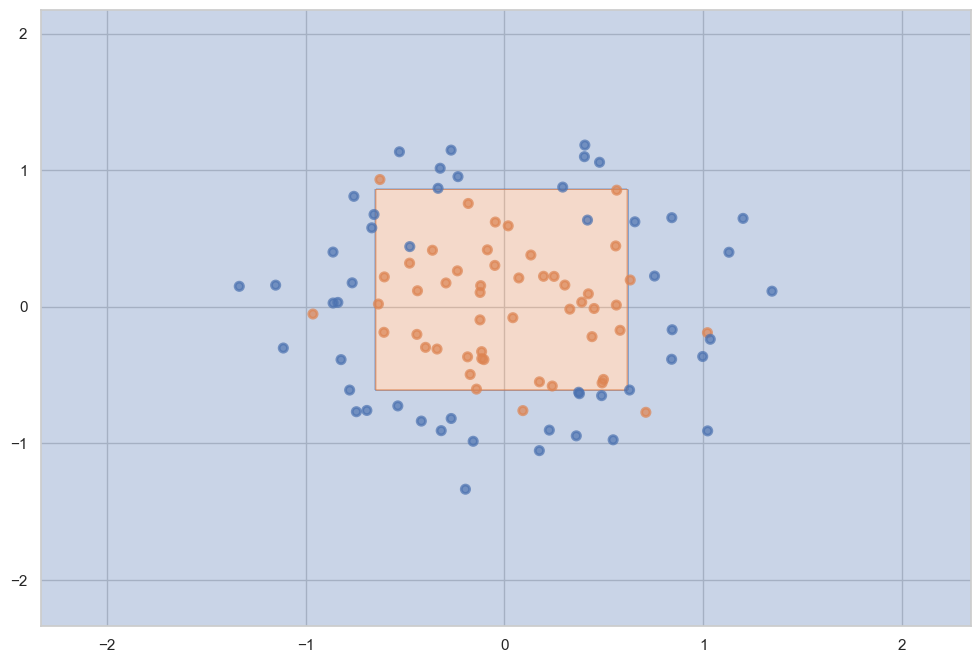

{'max_depth': 4, 'min_samples_leaf': 12}
Accuracy train: 0.8375
Accuracy test: 0.8

--------------------


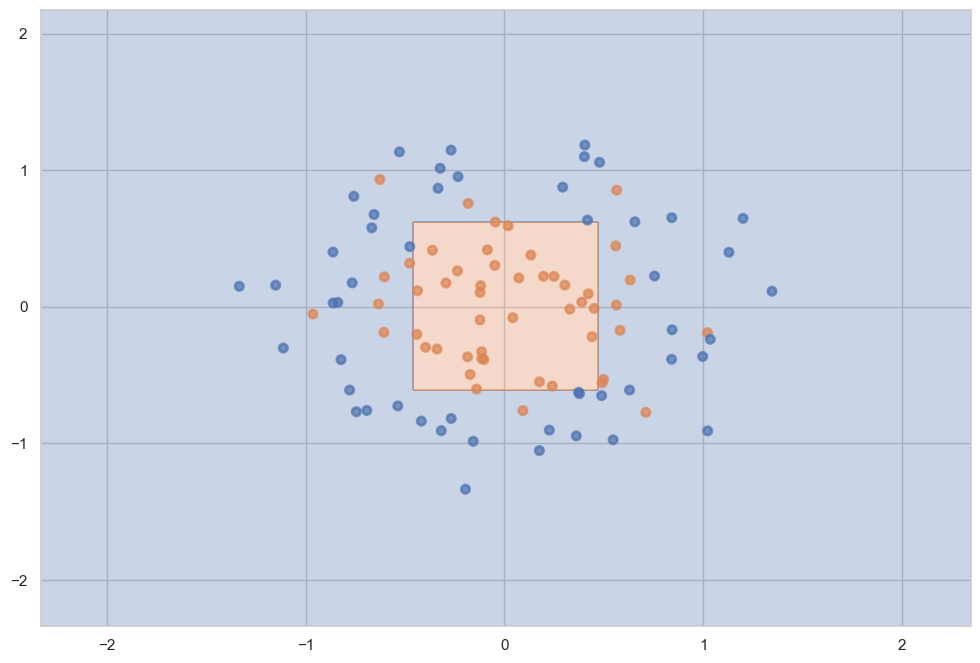

{'max_depth': 4, 'min_samples_leaf': 32}
Accuracy train: 0.5875
Accuracy test: 0.7

--------------------


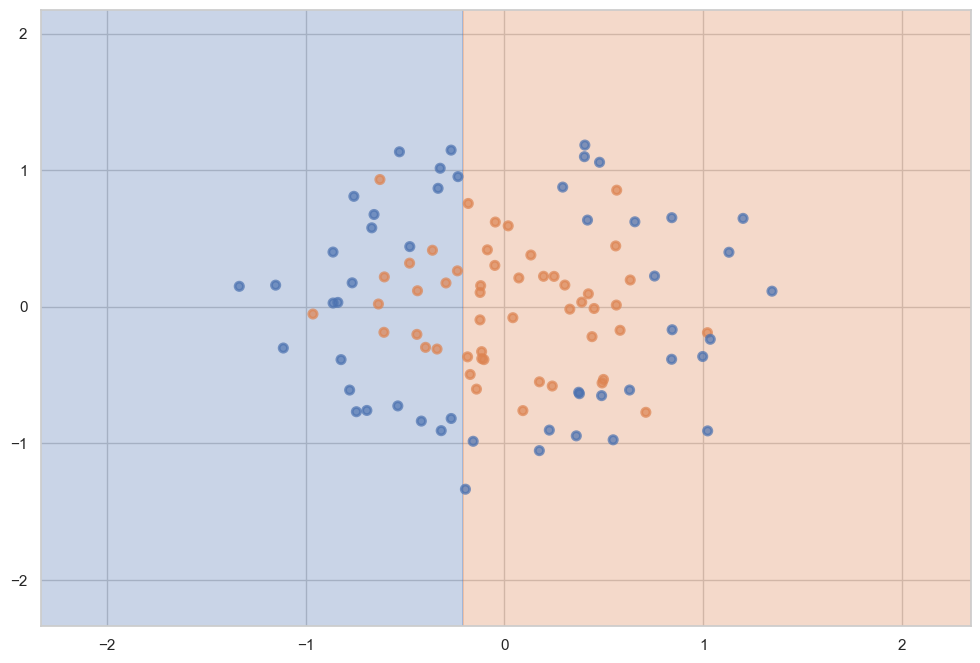

{'max_depth': 12, 'min_samples_leaf': 1}
Accuracy train: 1.0
Accuracy test: 0.75

--------------------


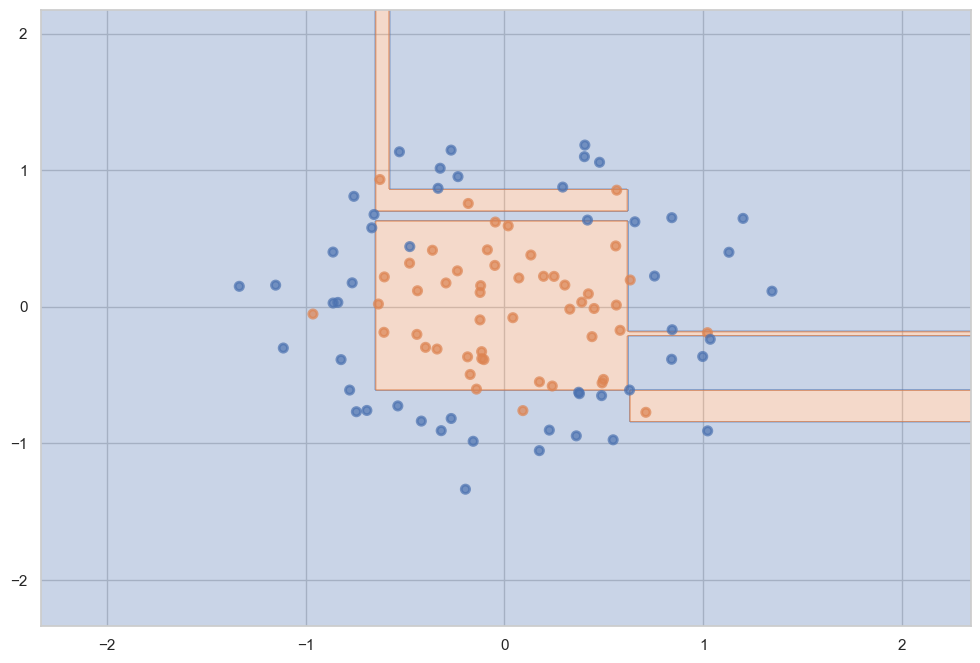

{'max_depth': 12, 'min_samples_leaf': 4}
Accuracy train: 0.95
Accuracy test: 0.8

--------------------


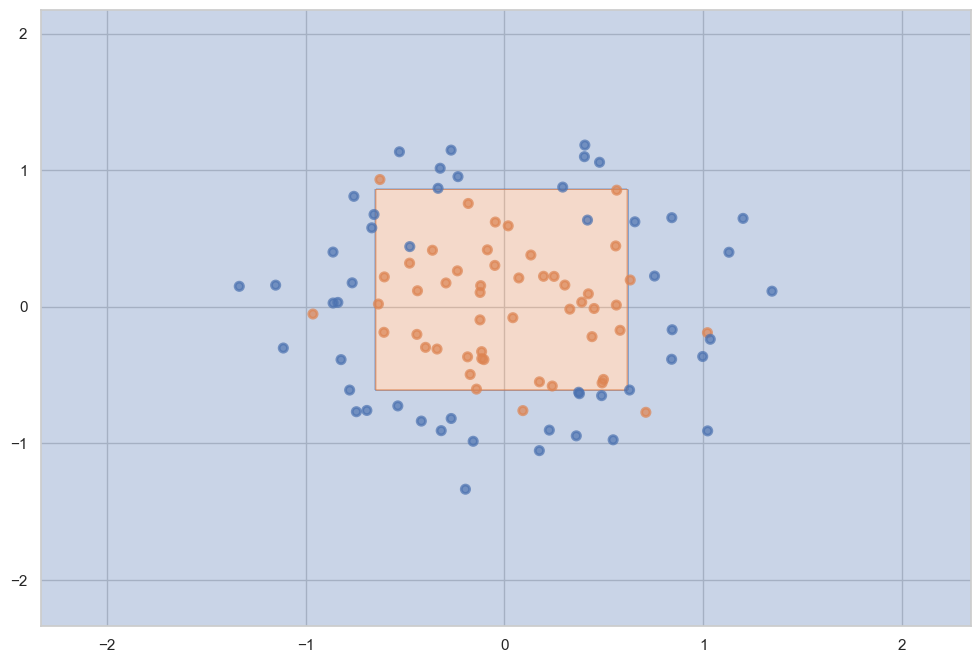

{'max_depth': 12, 'min_samples_leaf': 12}
Accuracy train: 0.8375
Accuracy test: 0.8

--------------------


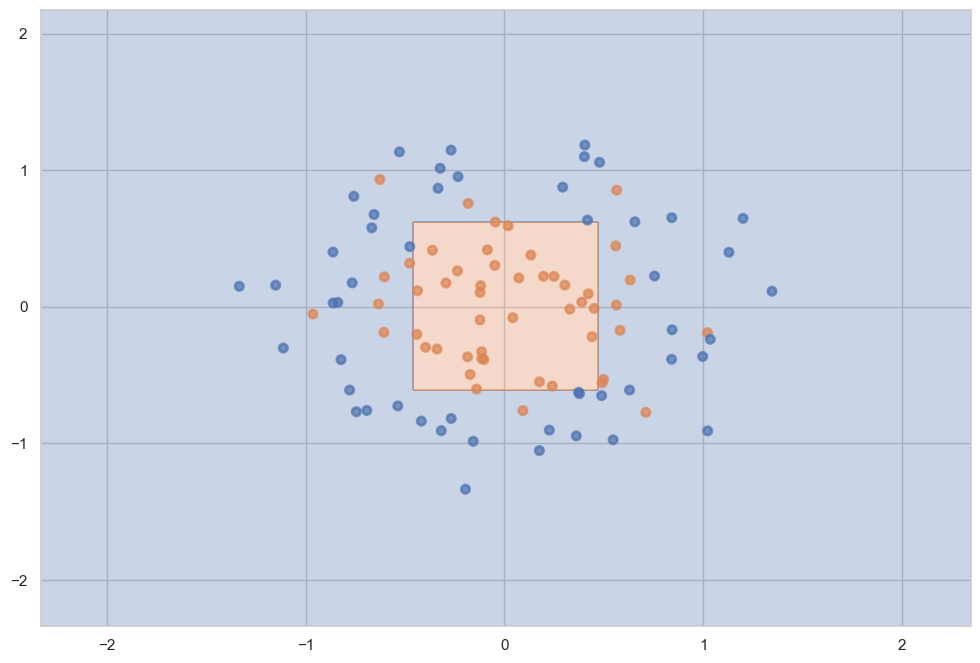

{'max_depth': 12, 'min_samples_leaf': 32}
Accuracy train: 0.5875
Accuracy test: 0.7

--------------------


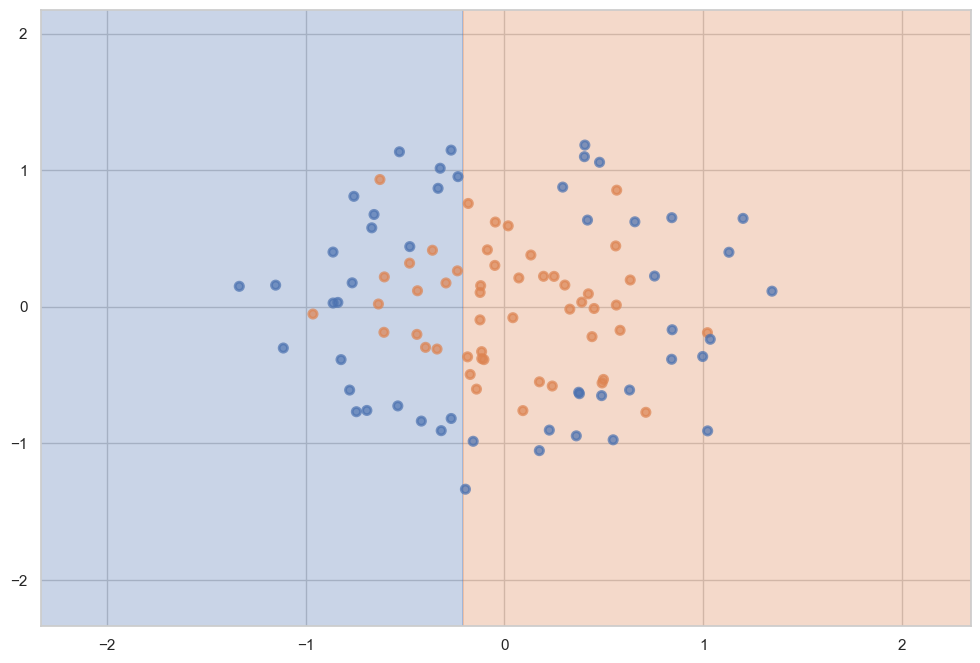

{'max_depth': 32, 'min_samples_leaf': 1}
Accuracy train: 1.0
Accuracy test: 0.75

--------------------


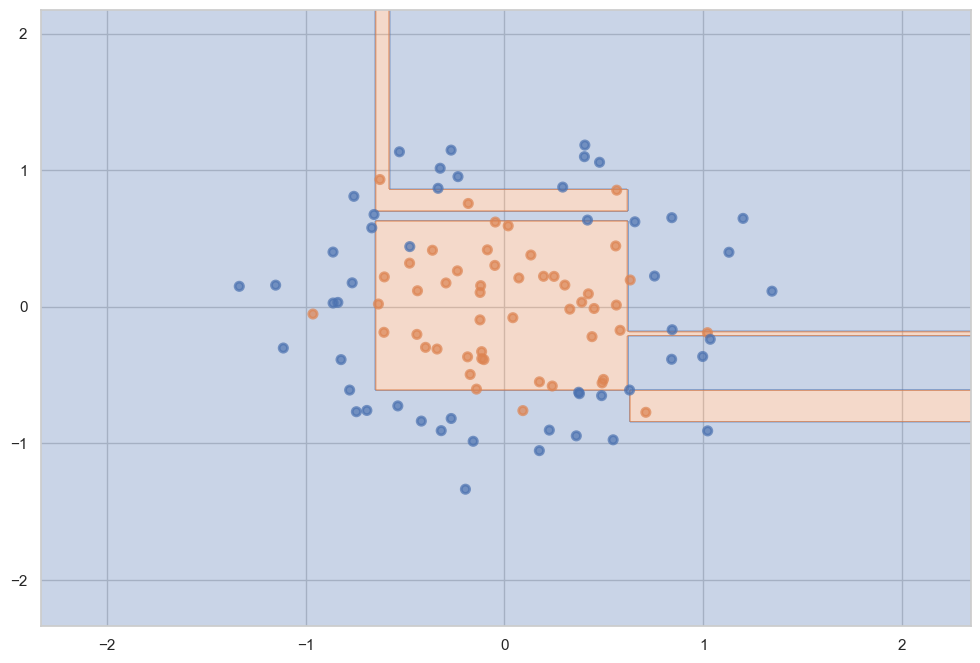

{'max_depth': 32, 'min_samples_leaf': 4}
Accuracy train: 0.95
Accuracy test: 0.8

--------------------


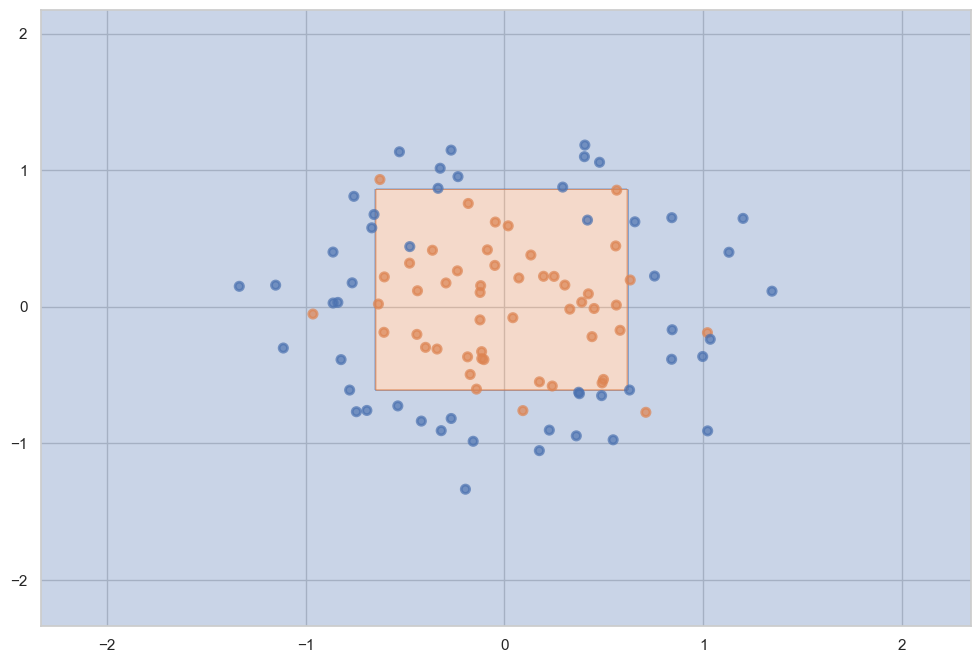

{'max_depth': 32, 'min_samples_leaf': 12}
Accuracy train: 0.8375
Accuracy test: 0.8

--------------------


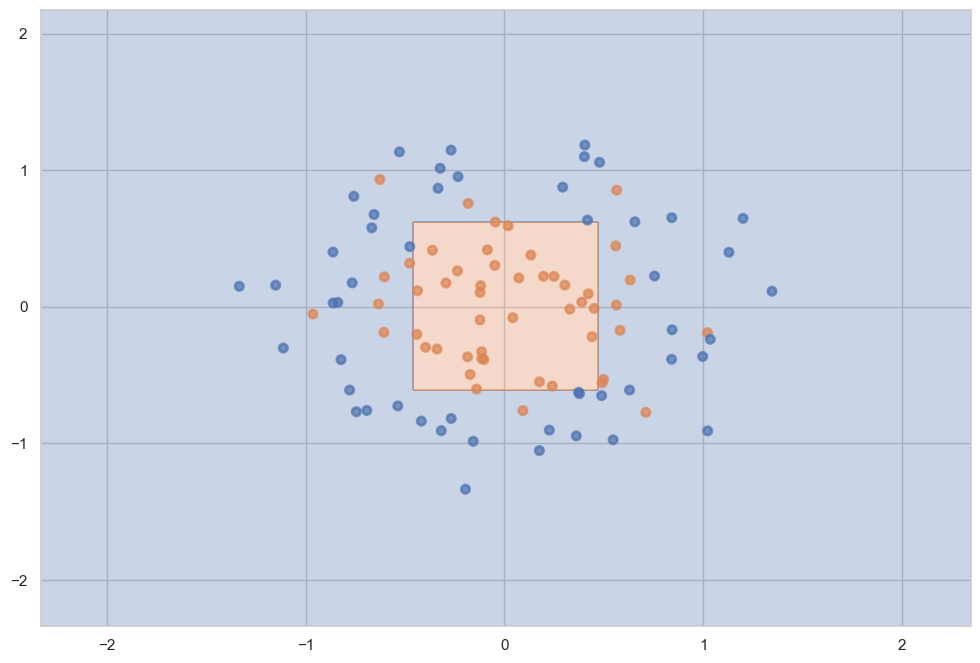

{'max_depth': 32, 'min_samples_leaf': 32}
Accuracy train: 0.5875
Accuracy test: 0.7

--------------------


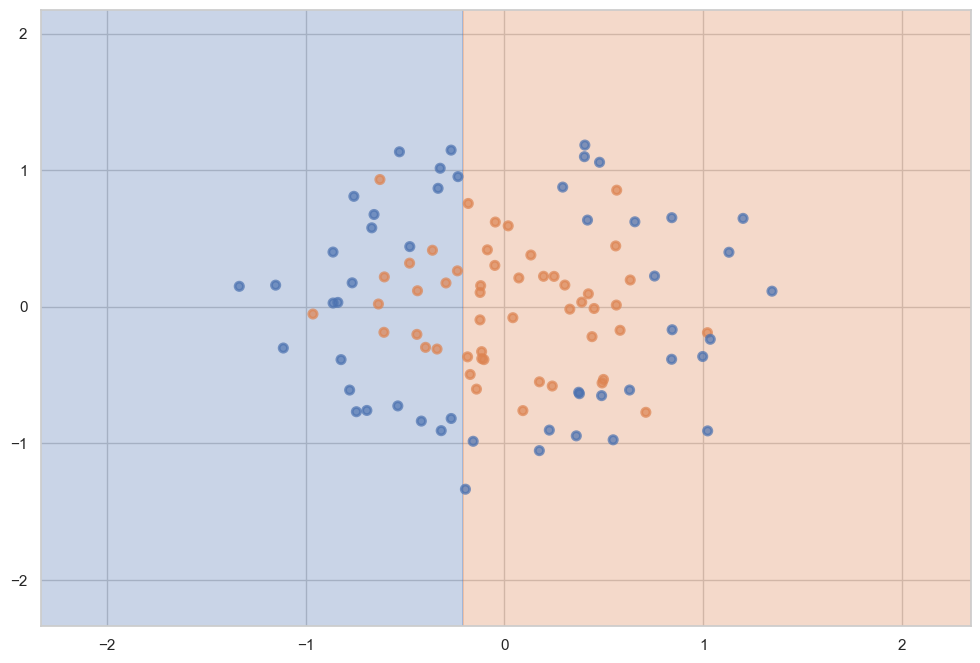

{'max_depth': 1, 'min_samples_leaf': 1}
Accuracy train: 0.825
Accuracy test: 0.85

--------------------


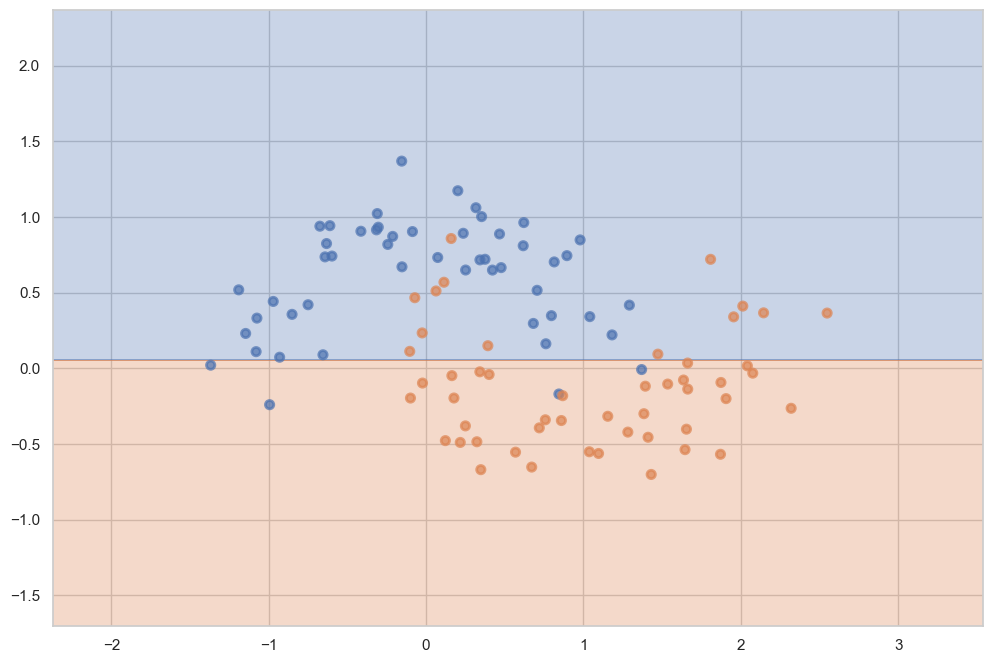

{'max_depth': 1, 'min_samples_leaf': 4}
Accuracy train: 0.825
Accuracy test: 0.85

--------------------


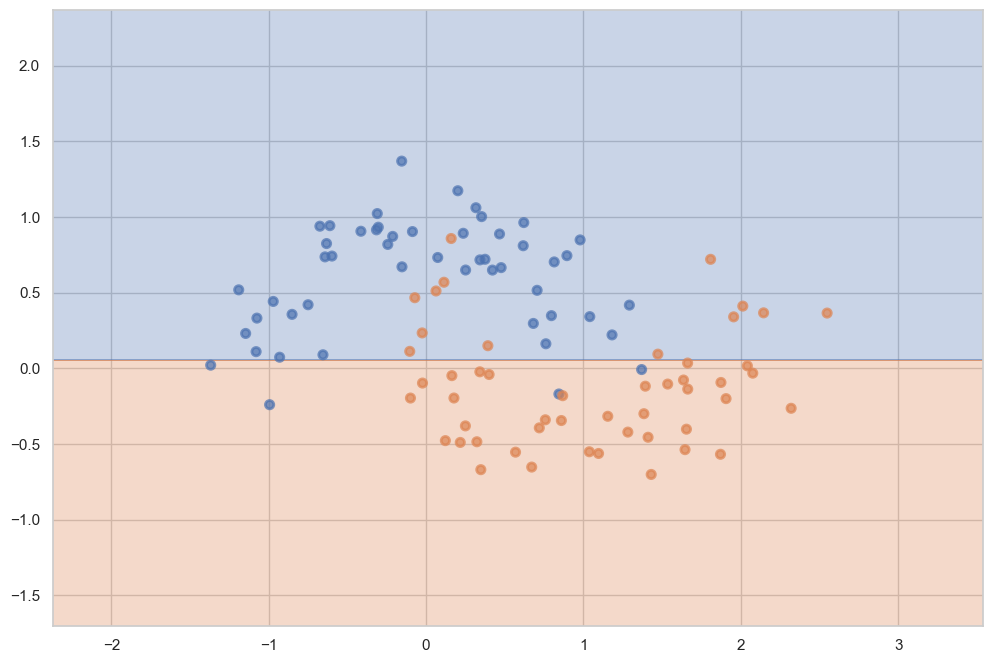

{'max_depth': 1, 'min_samples_leaf': 12}
Accuracy train: 0.825
Accuracy test: 0.85

--------------------


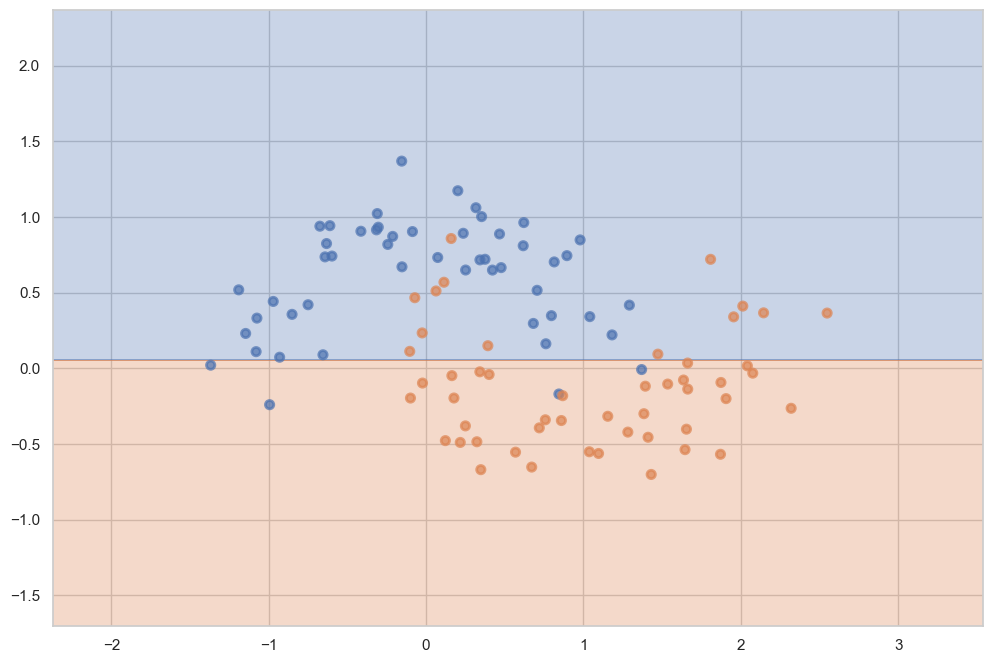

{'max_depth': 1, 'min_samples_leaf': 32}
Accuracy train: 0.8125
Accuracy test: 0.85

--------------------


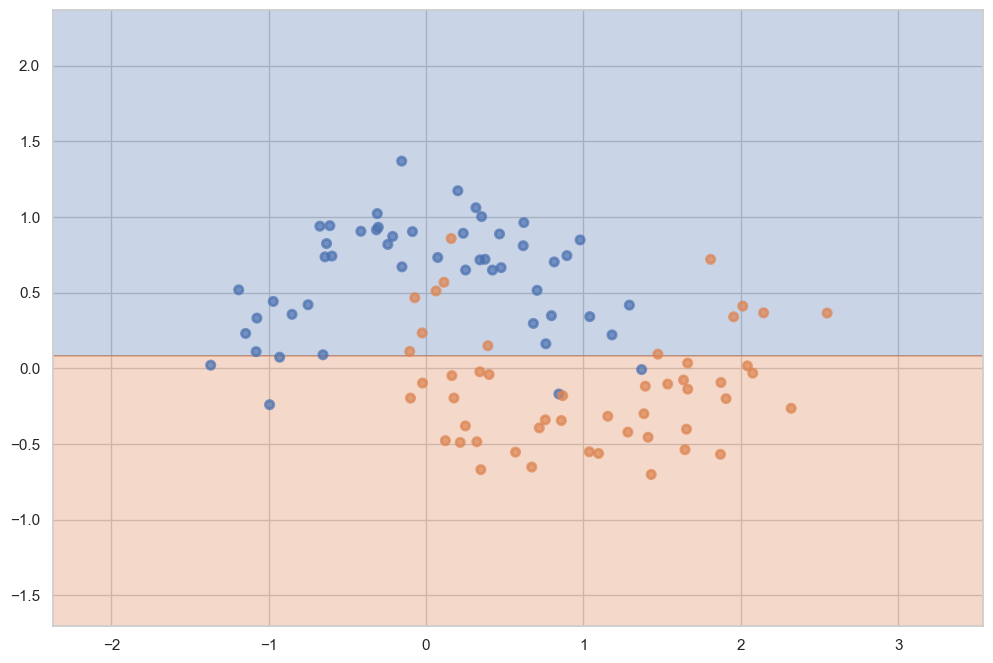

{'max_depth': 4, 'min_samples_leaf': 1}
Accuracy train: 0.9625
Accuracy test: 0.85

--------------------


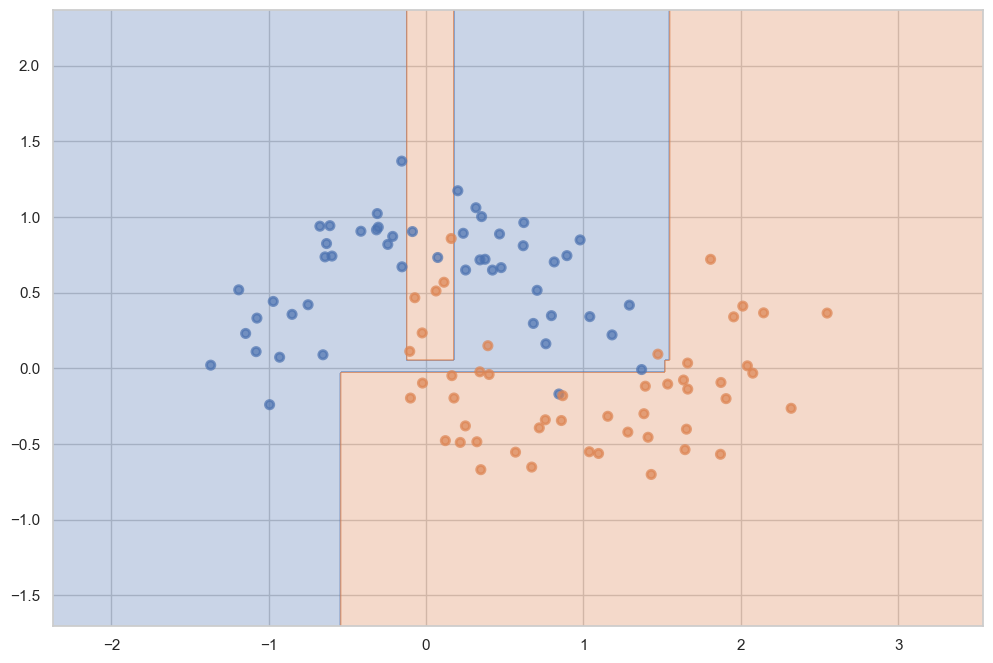

{'max_depth': 4, 'min_samples_leaf': 4}
Accuracy train: 0.9375
Accuracy test: 0.8

--------------------


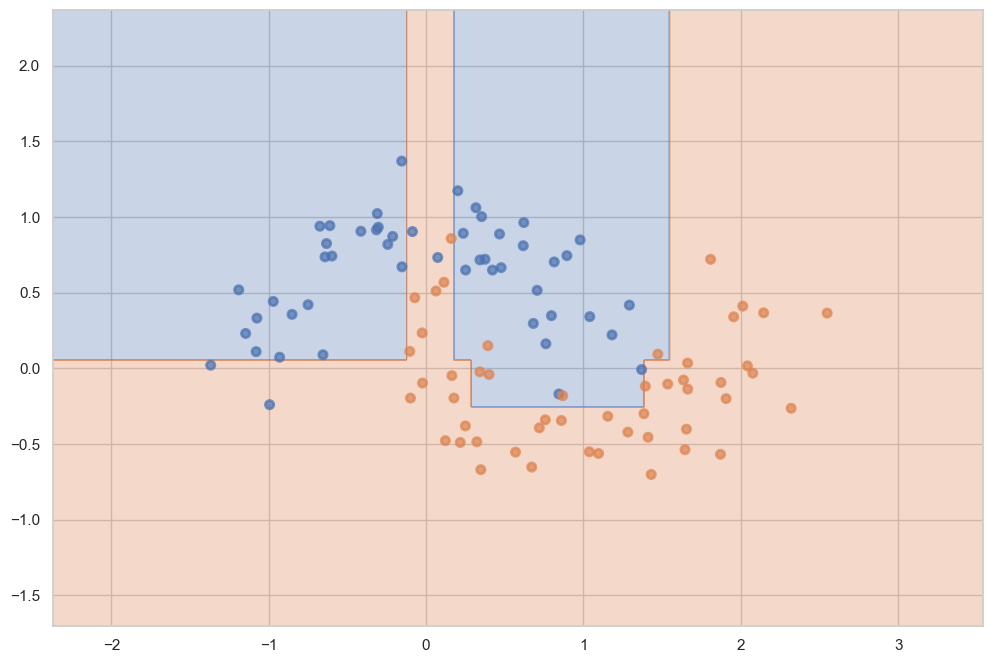

{'max_depth': 4, 'min_samples_leaf': 12}
Accuracy train: 0.85
Accuracy test: 0.95

--------------------


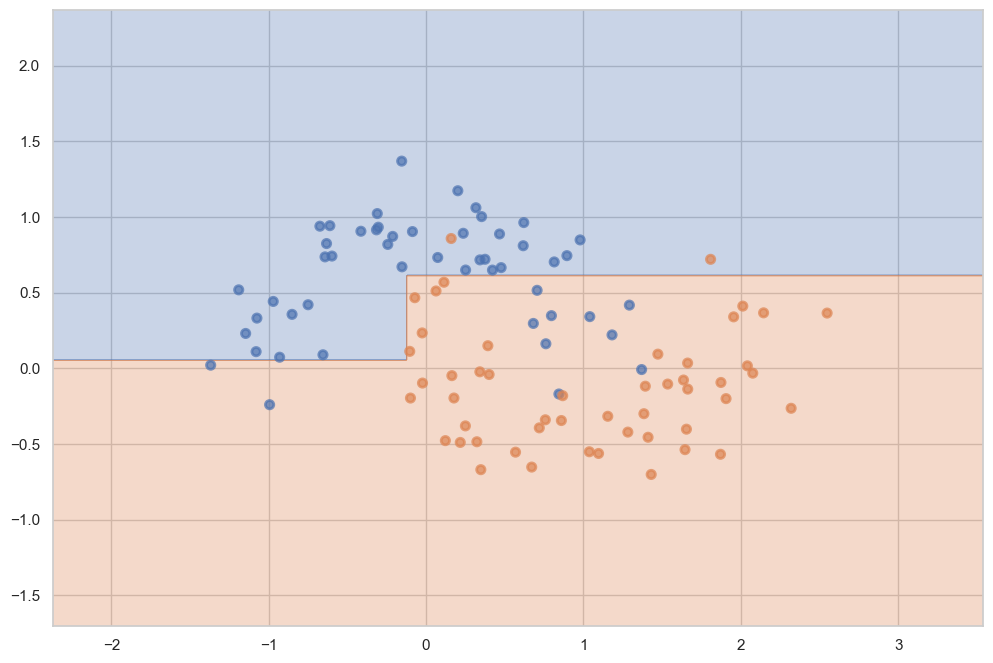

{'max_depth': 4, 'min_samples_leaf': 32}
Accuracy train: 0.8125
Accuracy test: 0.85

--------------------


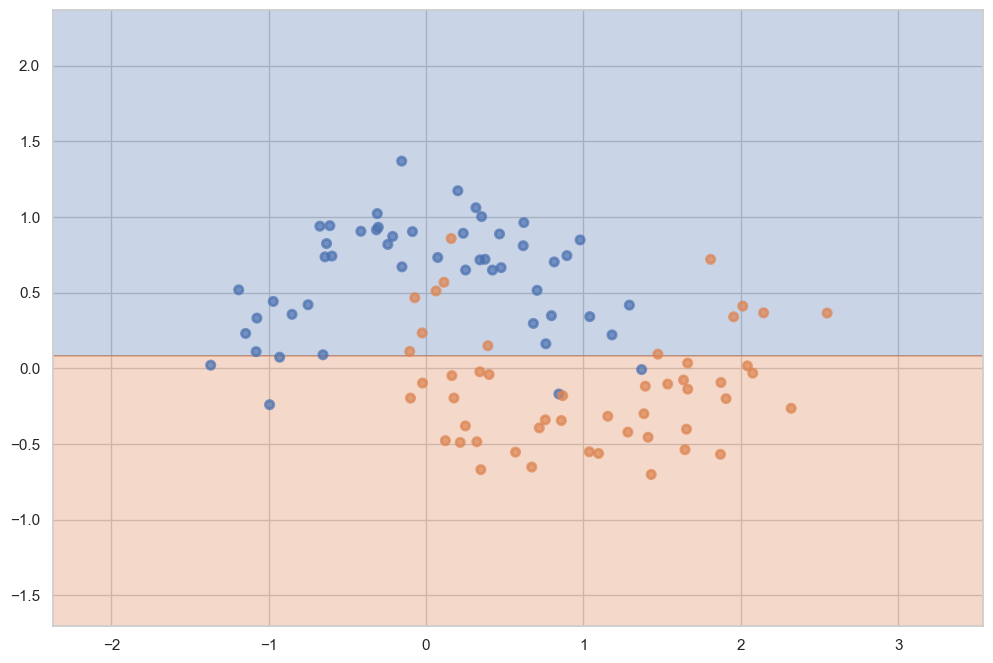

{'max_depth': 12, 'min_samples_leaf': 1}
Accuracy train: 1.0
Accuracy test: 0.95

--------------------


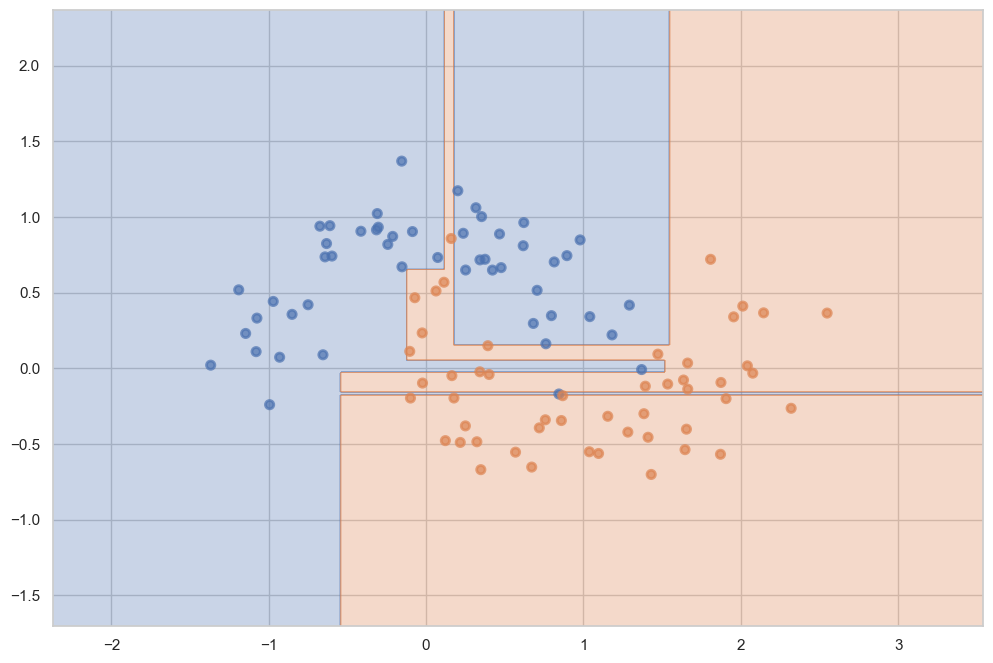

{'max_depth': 12, 'min_samples_leaf': 4}
Accuracy train: 0.9375
Accuracy test: 0.8

--------------------


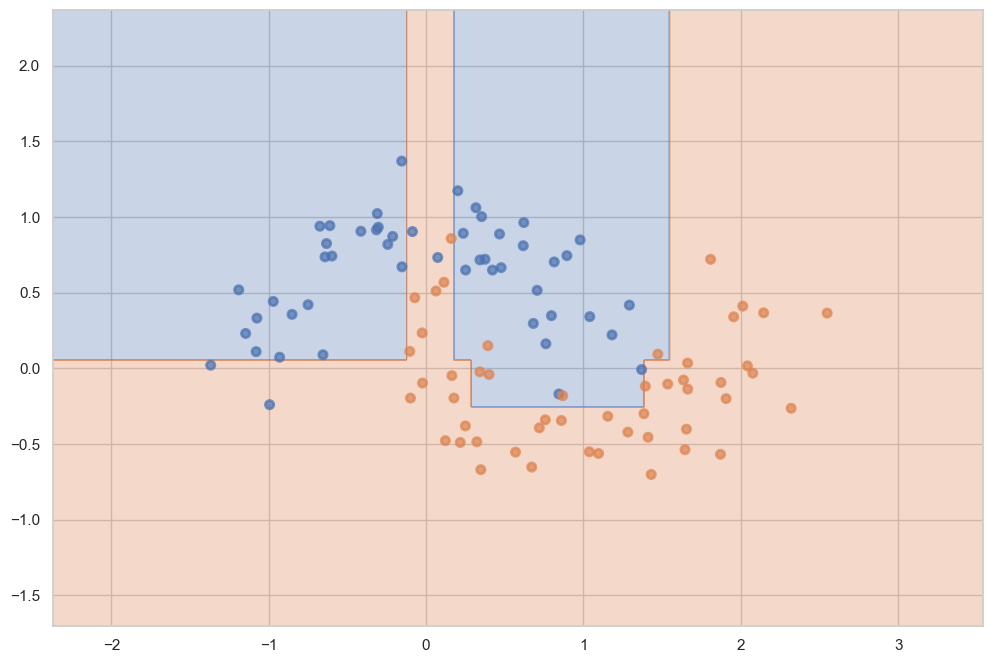

{'max_depth': 12, 'min_samples_leaf': 12}
Accuracy train: 0.85
Accuracy test: 0.95

--------------------


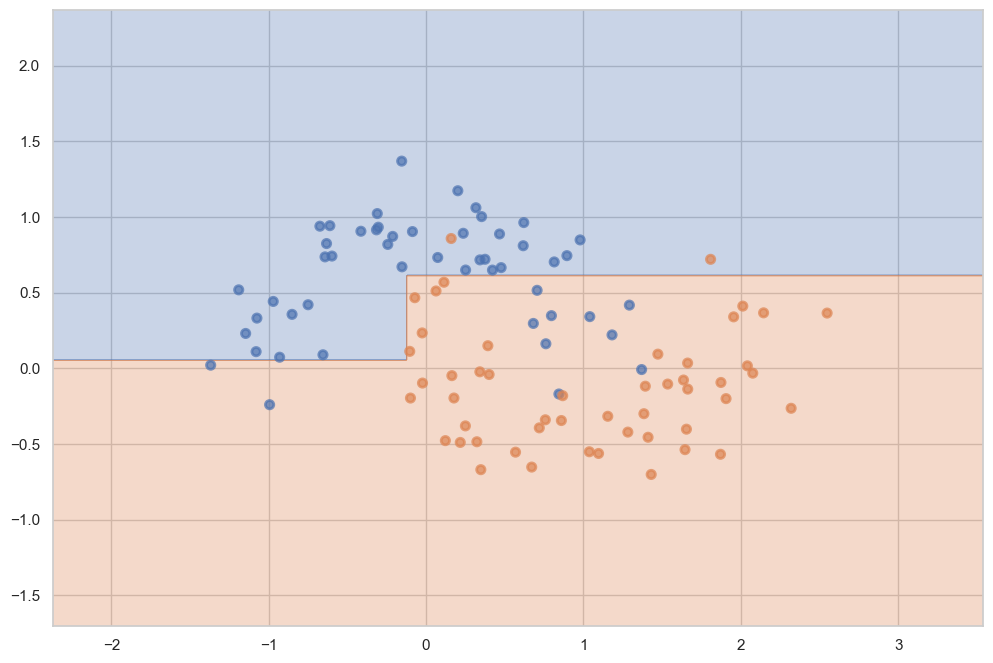

{'max_depth': 12, 'min_samples_leaf': 32}
Accuracy train: 0.8125
Accuracy test: 0.85

--------------------


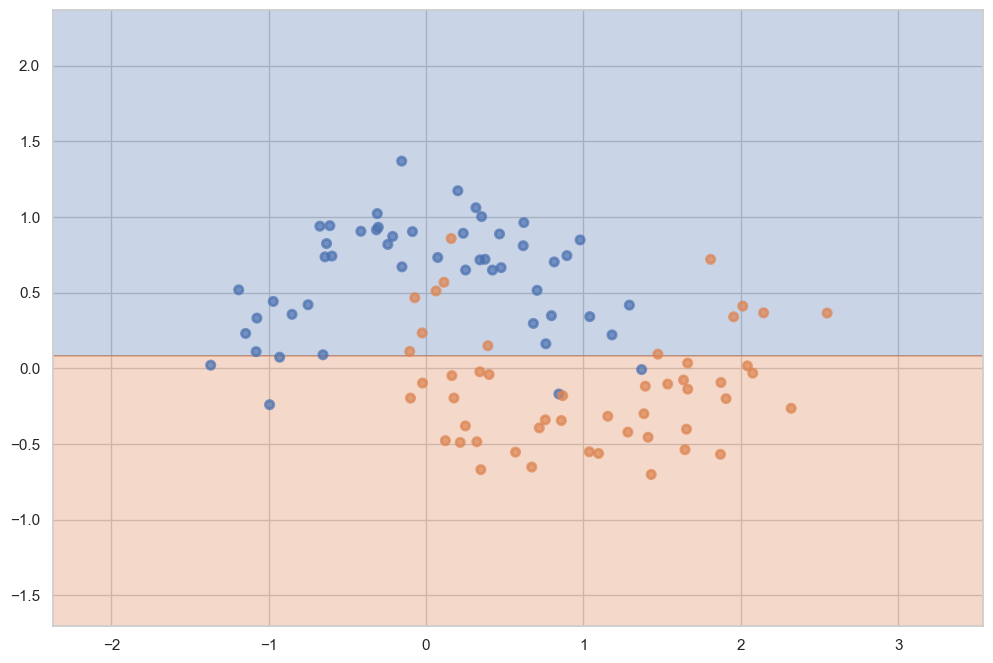

{'max_depth': 32, 'min_samples_leaf': 1}
Accuracy train: 1.0
Accuracy test: 0.95

--------------------


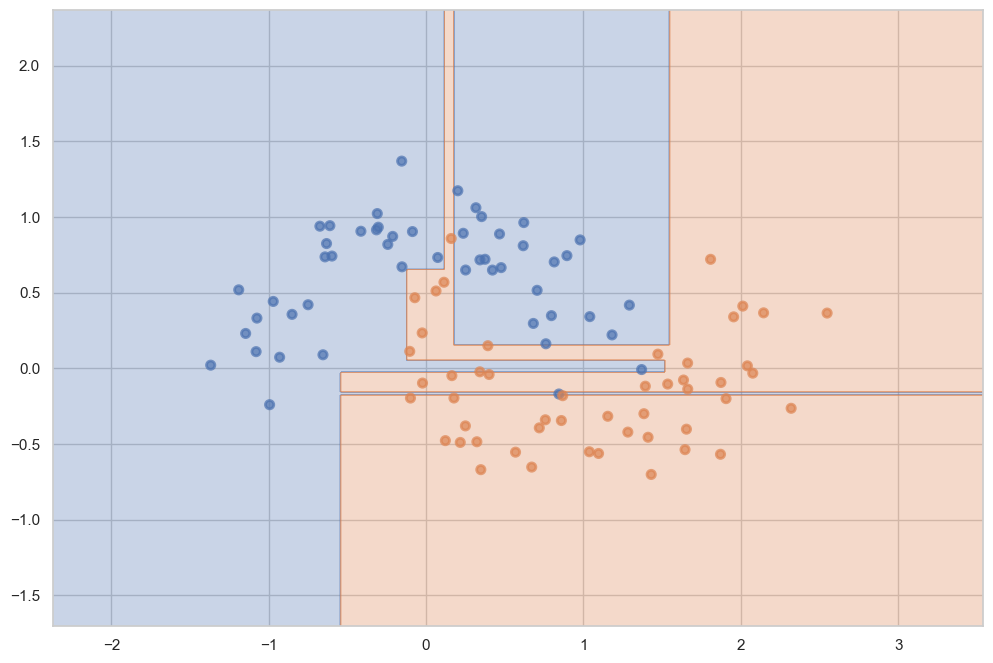

{'max_depth': 32, 'min_samples_leaf': 4}
Accuracy train: 0.9375
Accuracy test: 0.8

--------------------


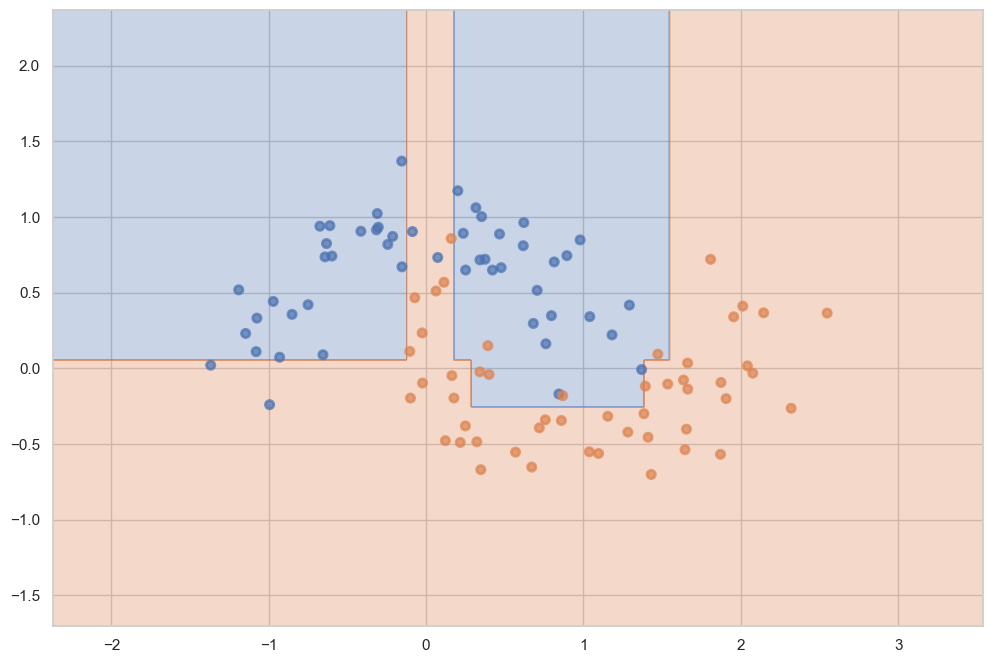

{'max_depth': 32, 'min_samples_leaf': 12}
Accuracy train: 0.85
Accuracy test: 0.95

--------------------


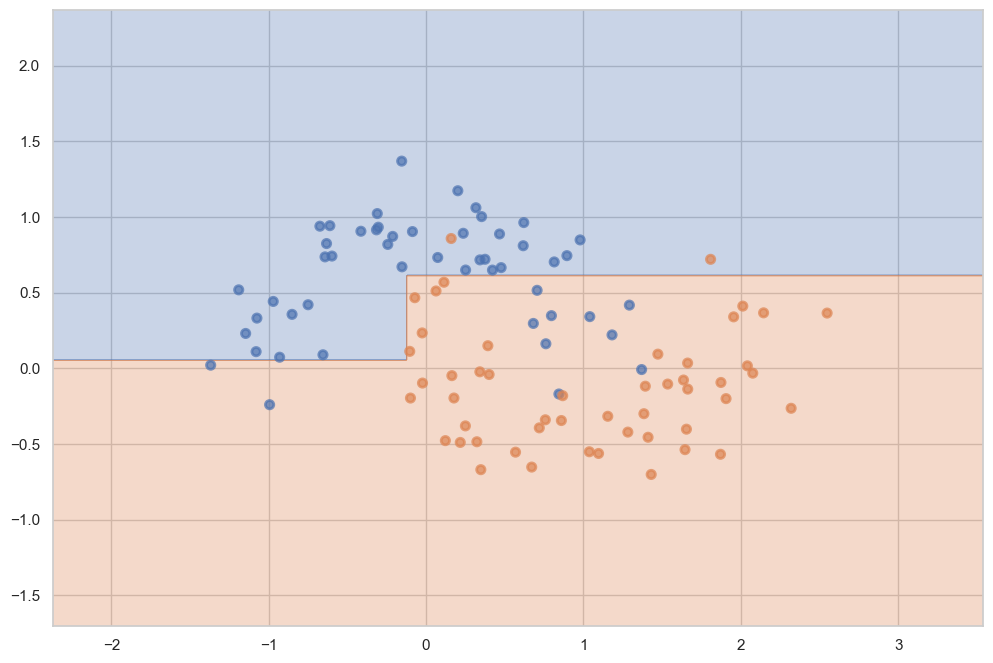

{'max_depth': 32, 'min_samples_leaf': 32}
Accuracy train: 0.8125
Accuracy test: 0.85

--------------------


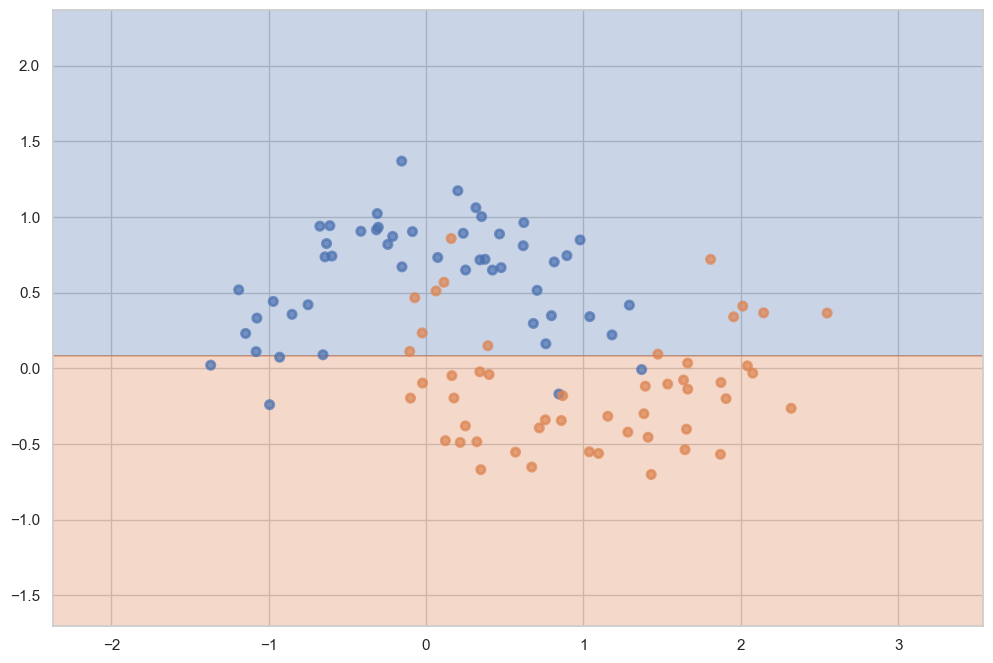

{'max_depth': 1, 'min_samples_leaf': 1}
Accuracy train: 0.7125
Accuracy test: 0.45

--------------------


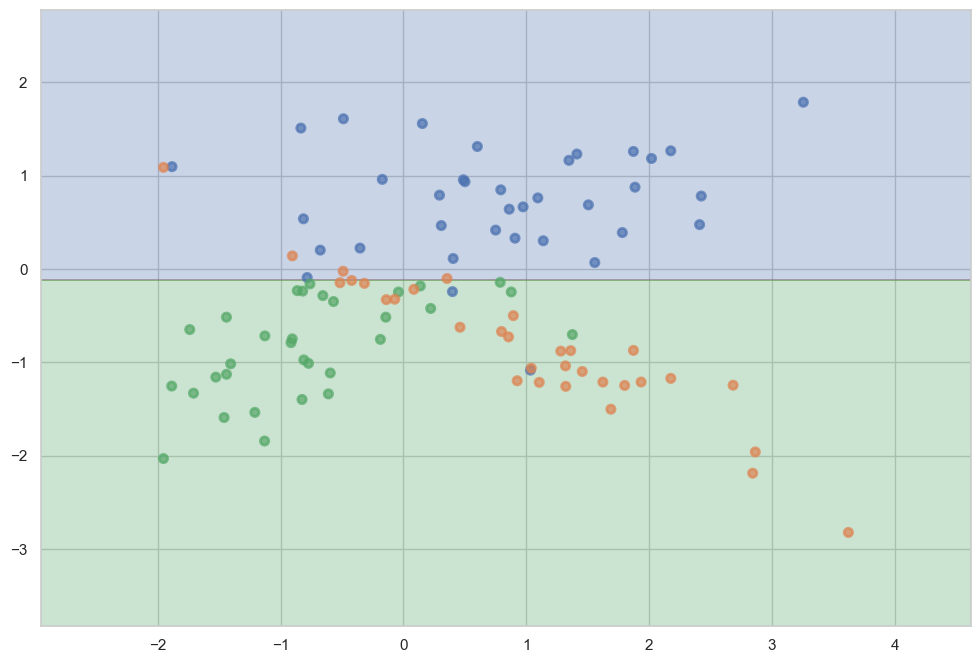

{'max_depth': 1, 'min_samples_leaf': 4}
Accuracy train: 0.7125
Accuracy test: 0.45

--------------------


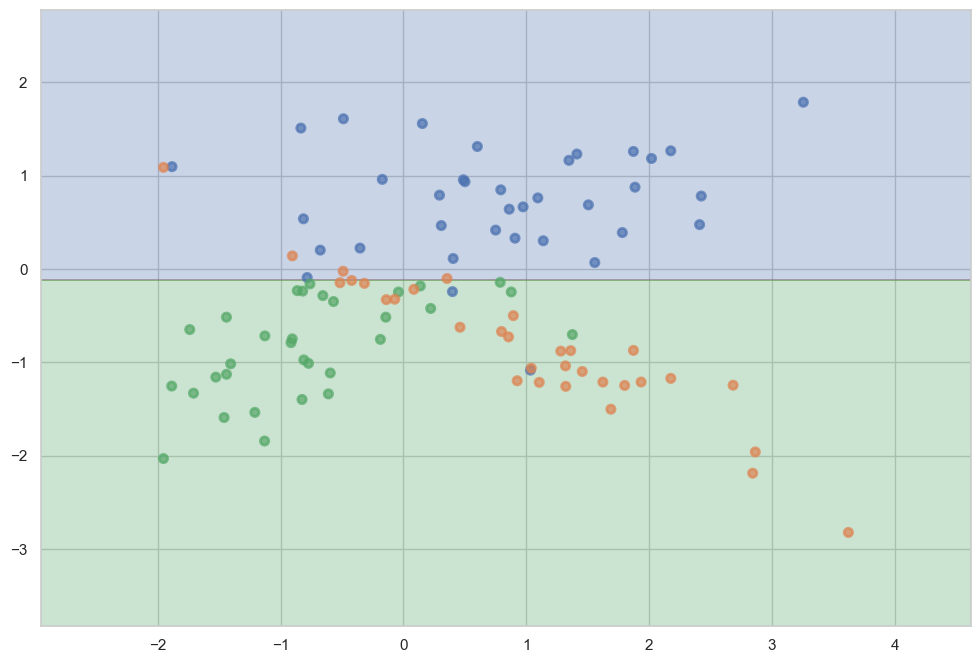

{'max_depth': 1, 'min_samples_leaf': 12}
Accuracy train: 0.7125
Accuracy test: 0.45

--------------------


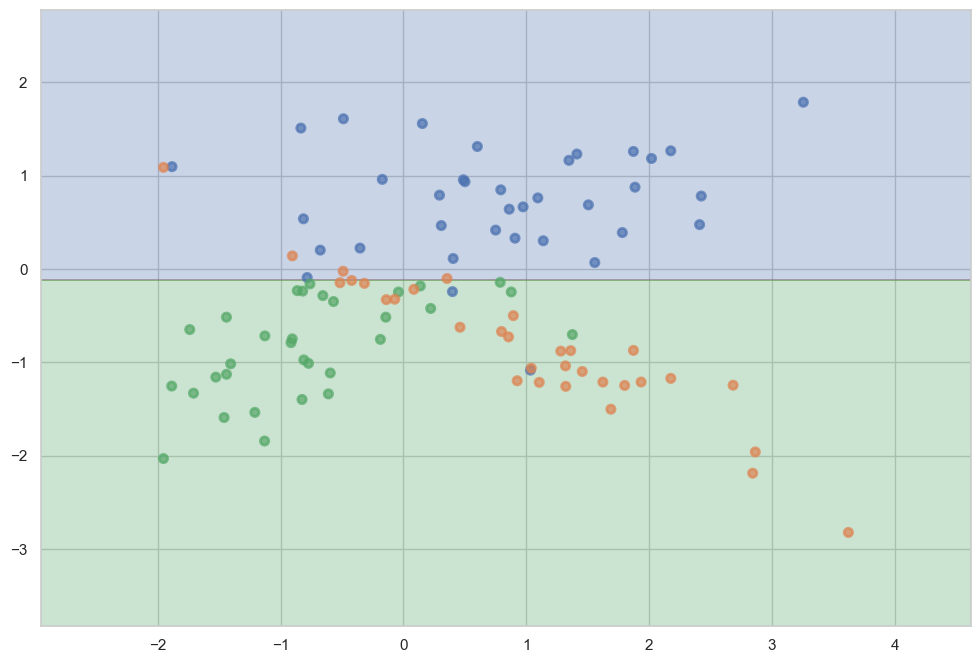

{'max_depth': 1, 'min_samples_leaf': 32}
Accuracy train: 0.7
Accuracy test: 0.45

--------------------


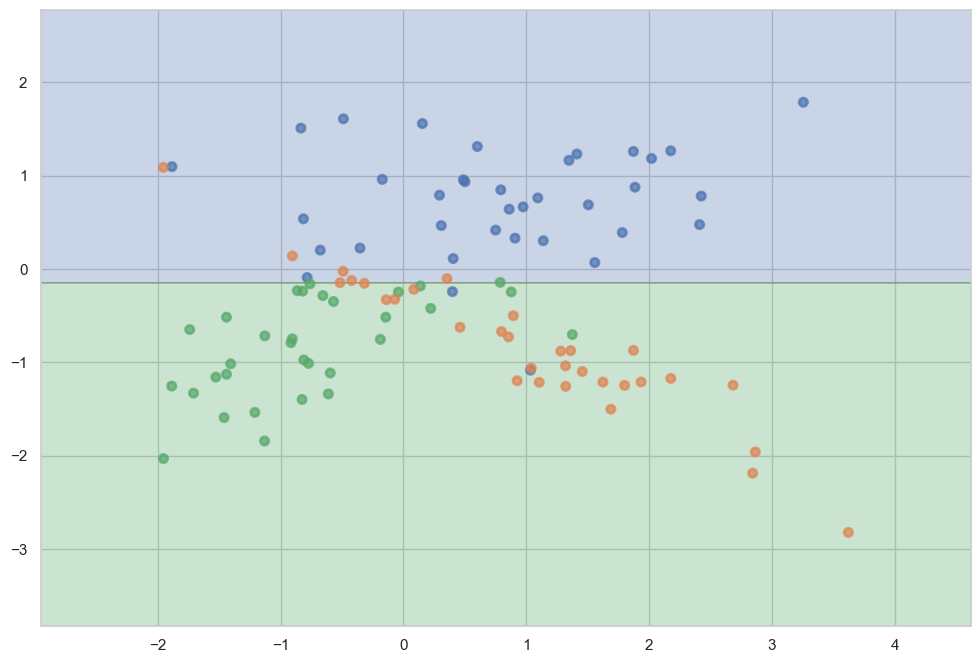

{'max_depth': 4, 'min_samples_leaf': 1}
Accuracy train: 0.95
Accuracy test: 0.8

--------------------


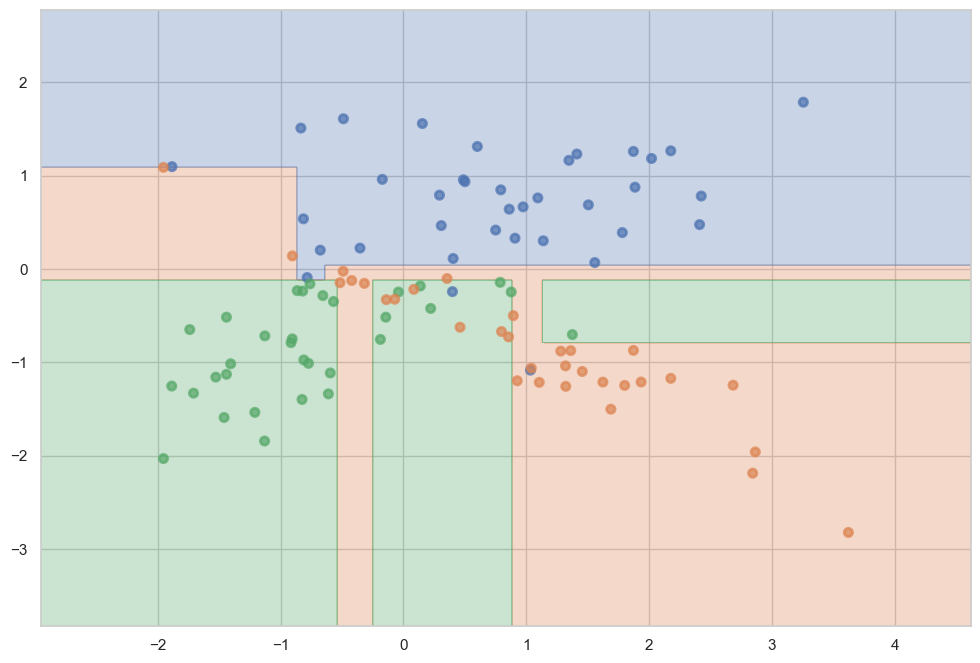

{'max_depth': 4, 'min_samples_leaf': 4}
Accuracy train: 0.9
Accuracy test: 0.75

--------------------


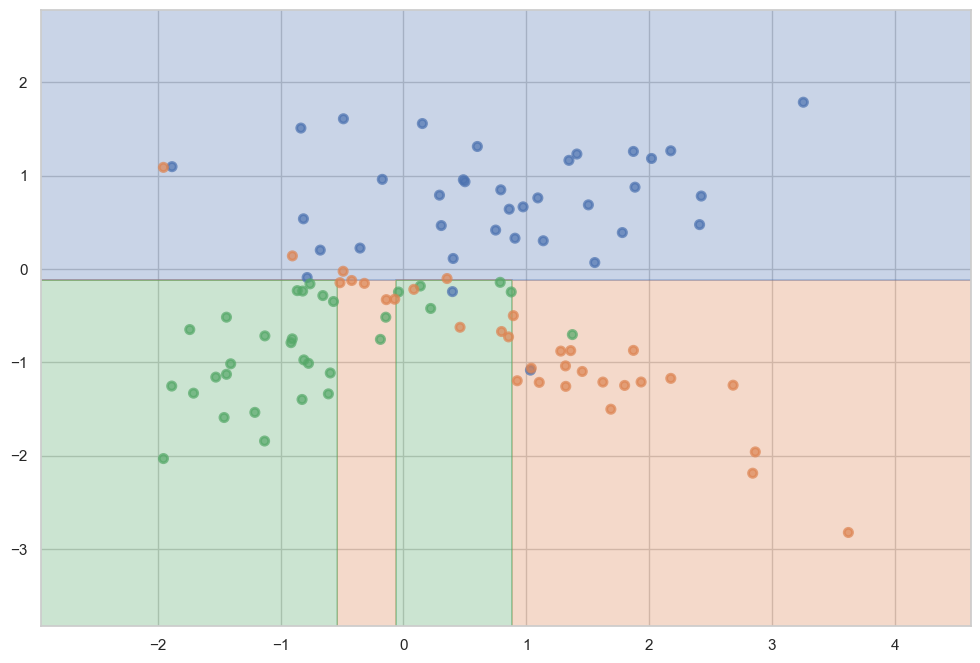

{'max_depth': 4, 'min_samples_leaf': 12}
Accuracy train: 0.875
Accuracy test: 0.7

--------------------


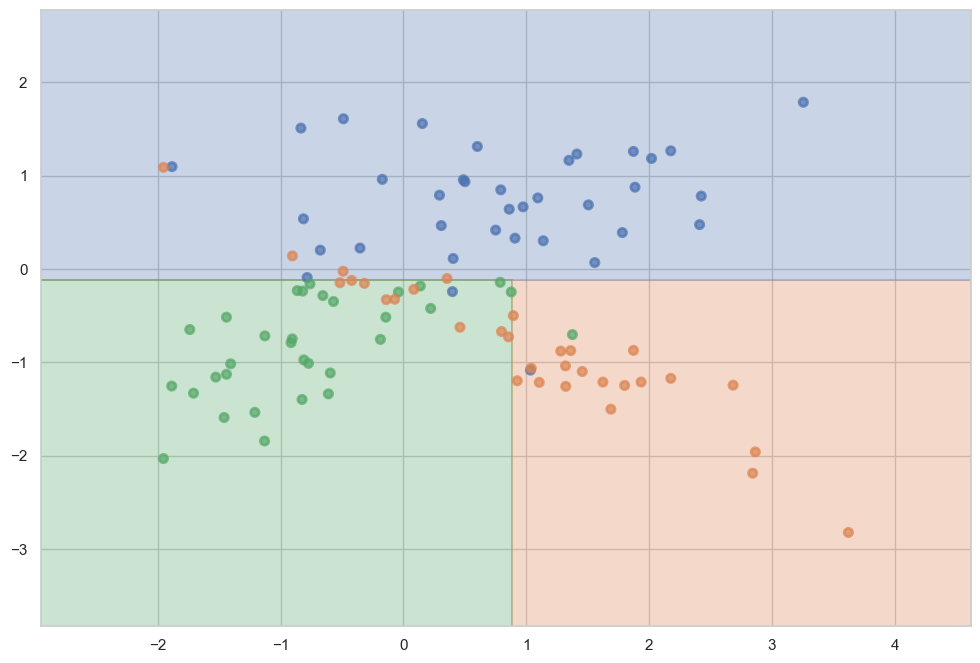

{'max_depth': 4, 'min_samples_leaf': 32}
Accuracy train: 0.7
Accuracy test: 0.45

--------------------


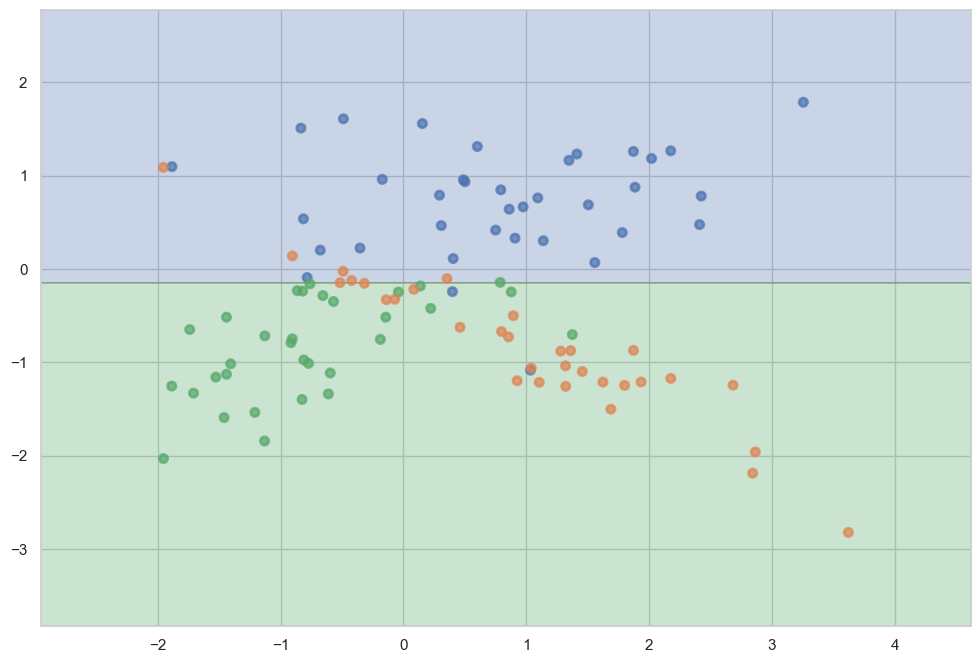

{'max_depth': 12, 'min_samples_leaf': 1}
Accuracy train: 1.0
Accuracy test: 0.85

--------------------


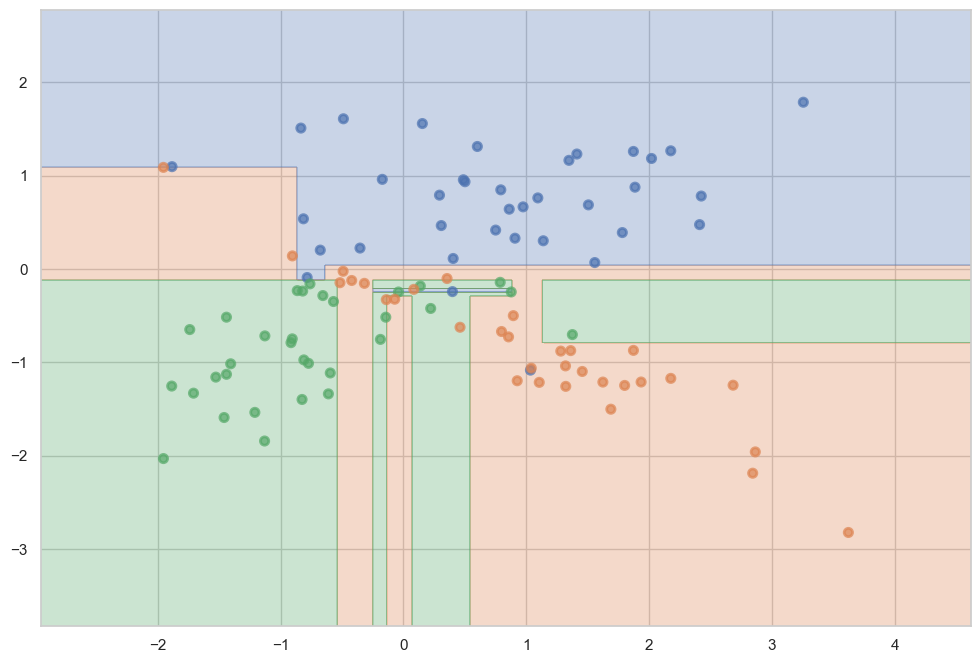

{'max_depth': 12, 'min_samples_leaf': 4}
Accuracy train: 0.9
Accuracy test: 0.75

--------------------


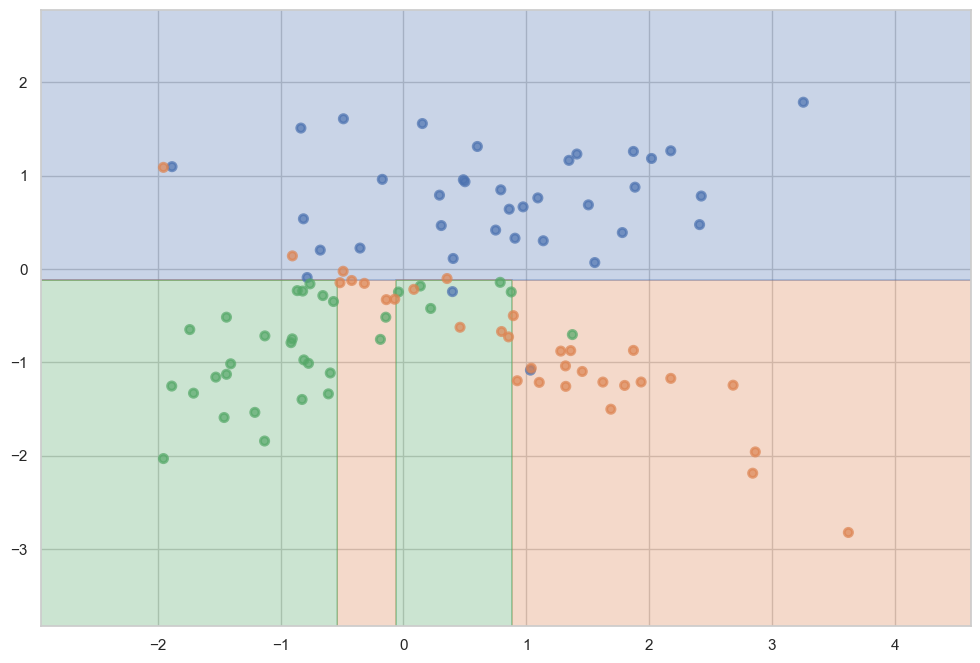

{'max_depth': 12, 'min_samples_leaf': 12}
Accuracy train: 0.875
Accuracy test: 0.7

--------------------


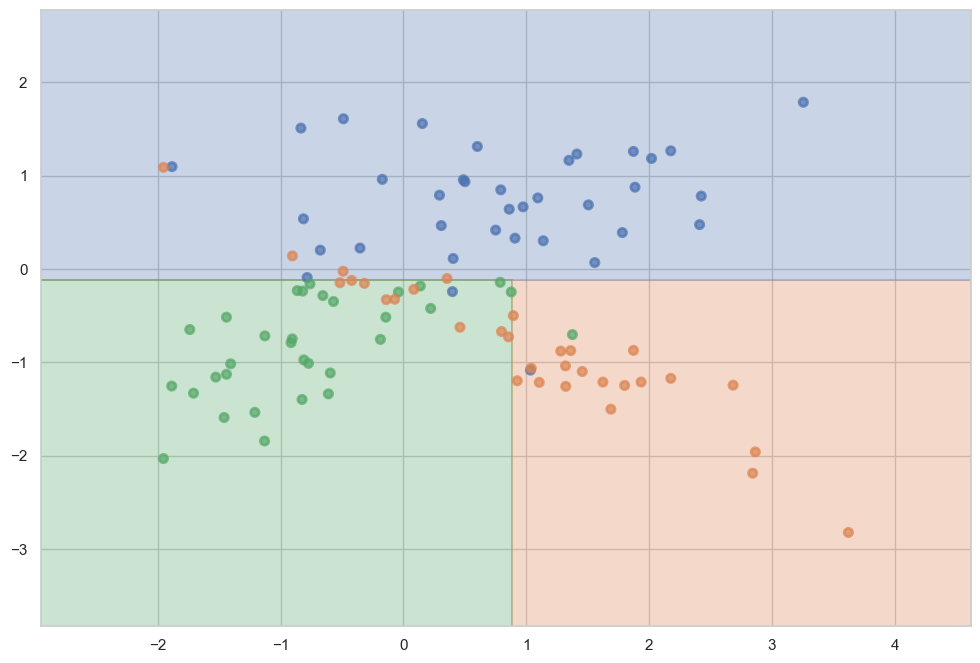

{'max_depth': 12, 'min_samples_leaf': 32}
Accuracy train: 0.7
Accuracy test: 0.45

--------------------


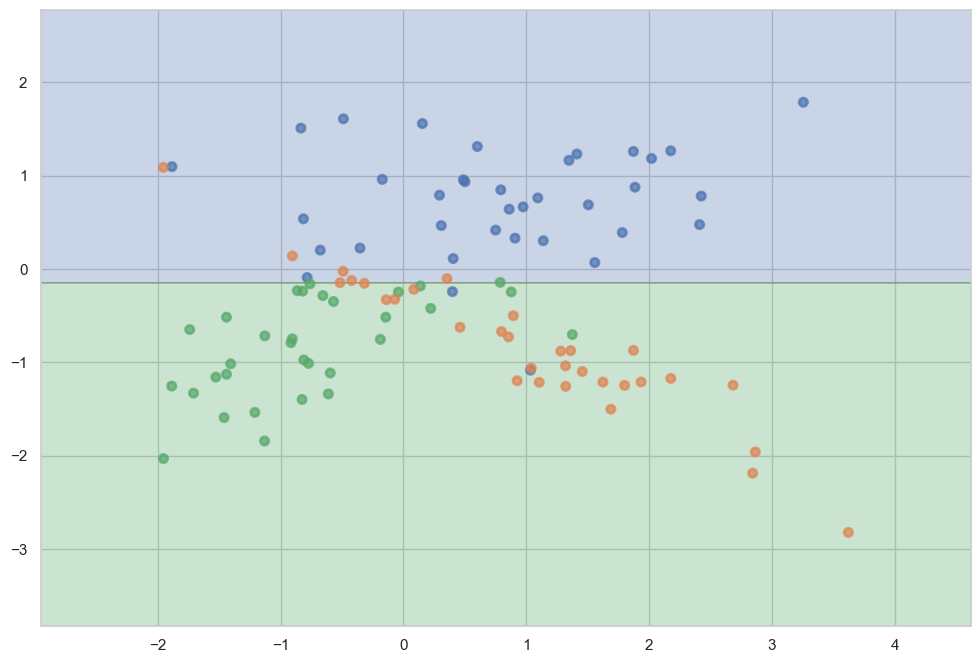

{'max_depth': 32, 'min_samples_leaf': 1}
Accuracy train: 1.0
Accuracy test: 0.85

--------------------


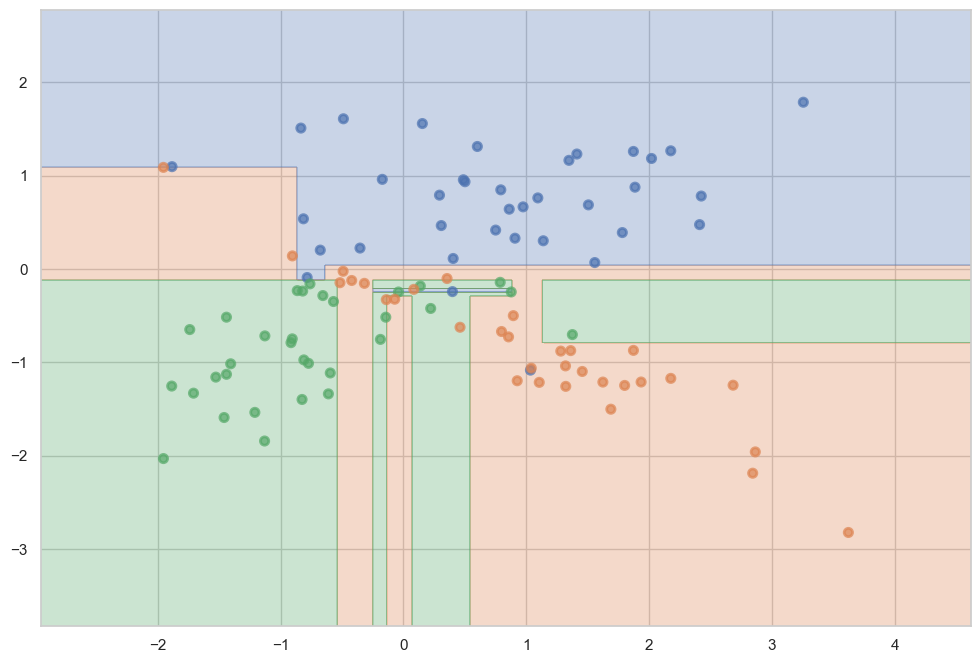

{'max_depth': 32, 'min_samples_leaf': 4}
Accuracy train: 0.9
Accuracy test: 0.75

--------------------


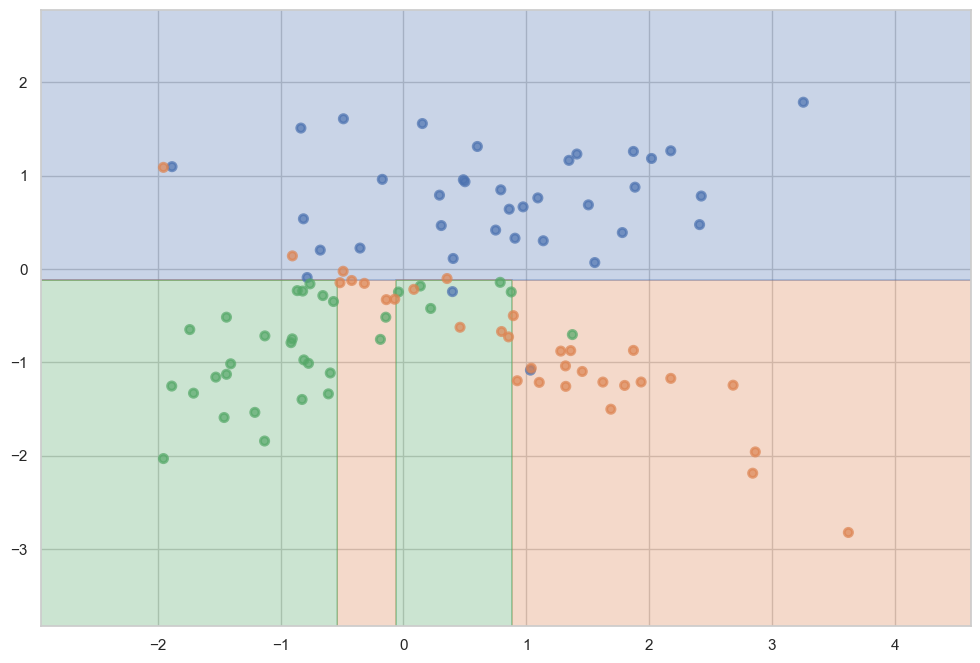

{'max_depth': 32, 'min_samples_leaf': 12}
Accuracy train: 0.875
Accuracy test: 0.7

--------------------


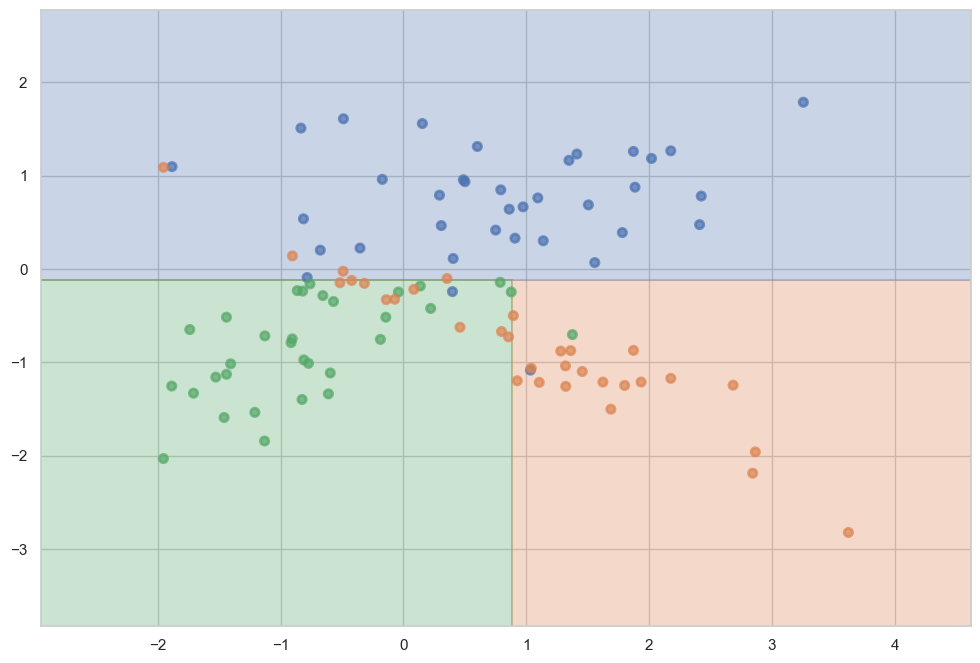

{'max_depth': 32, 'min_samples_leaf': 32}
Accuracy train: 0.7
Accuracy test: 0.45

--------------------


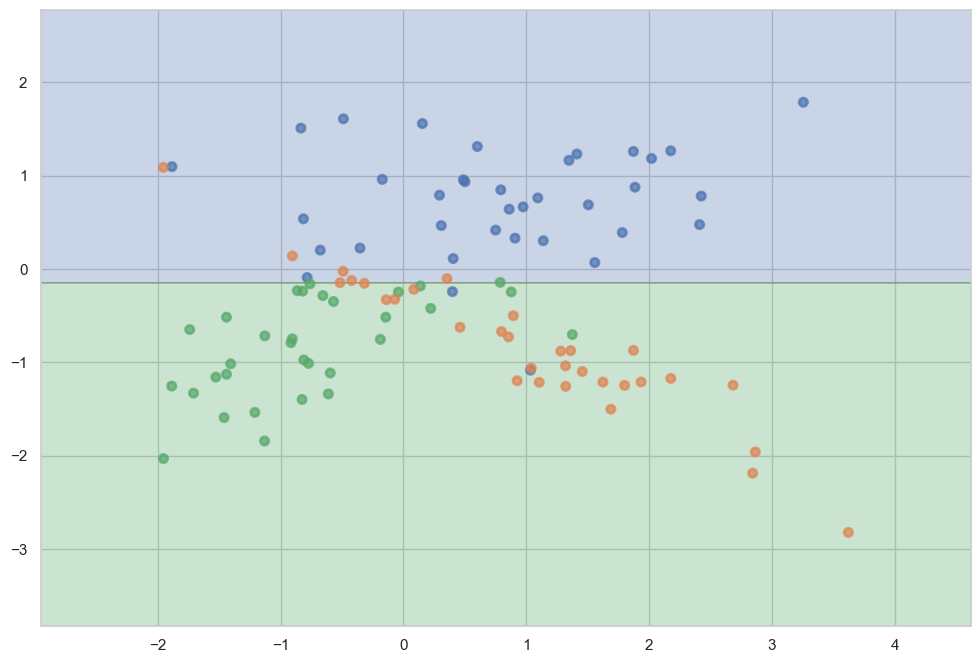

In [10]:
from sklearn.metrics import accuracy_score

params = {
    'max_depth': [1, 4, 12, 32],
    'min_samples_leaf': [1, 4, 12, 32]
}

for ds in datasets:
    X, y = ds
    params_gen = generate_params_dicts(params)

    for idx, cur_params in enumerate(params_gen):
        clf = DecisionTreeClassifier(**cur_params, min_samples_split=2)
        acc_train, acc_test = fit_plot_trees(clf, accuracy_score, X, y)
        print(cur_params)
        print('Accuracy train:', acc_train)
        print('Accuracy test:', acc_test)
        print()
        print('-' * 20)
        plt.show()

__Ответ:__ Большой max_depth и маленький min_samples_leaf ведут к сильному переобучению дерева, ведь тогда дерево может оставлять по очень маленькому числу объектов в листе, вплоть до 1.
Обобщающая способность из-за этого падает. При маленьком max_depth или большом min_samples_leaf дерево недообучается, и тоже не имеет обобщающей способности.
Поэтому нужно балансировать между переобучением и недообучением.
Кажется, что более сложный датасет сильнее склоняетя к переобучению при плохих параметрах.
А в датасете с 3мя классами простое дерево вовсе игнорирует наименьший класс

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

### dashagarov@edu.hse.ru
### Посылка: https://contest.yandex.ru/contest/43413/run-report/76087722/

Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.


__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [12]:
X = df.loc[:, 'STG':'PEG']
y = df['UNS']

-0.45397707504410645
-0.4650194980401841
-0.46733829445545116
-0.4546683192930121
-0.08606560274912149


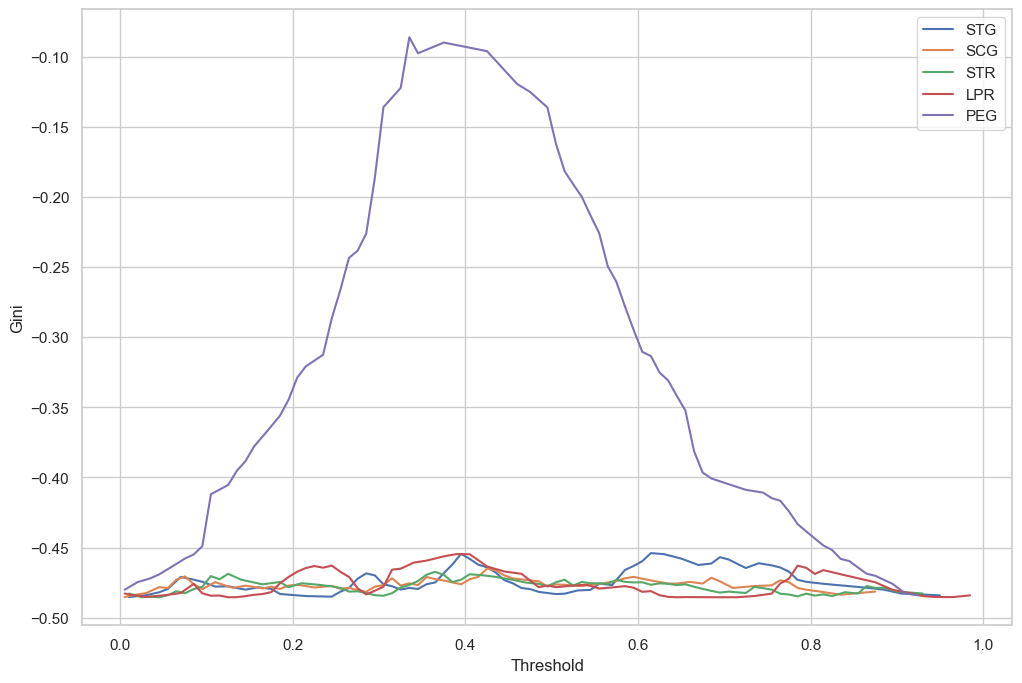

In [13]:
from hw5code import find_best_split

for col in X.columns:
    thresholds, ginis, best_threshold, best_gini = find_best_split(X[col].values, y.values)
    plt.plot(thresholds, ginis, label=col)
    print(best_gini)
plt.xlabel('Threshold')
plt.ylabel('Gini')
plt.legend()
plt.show()

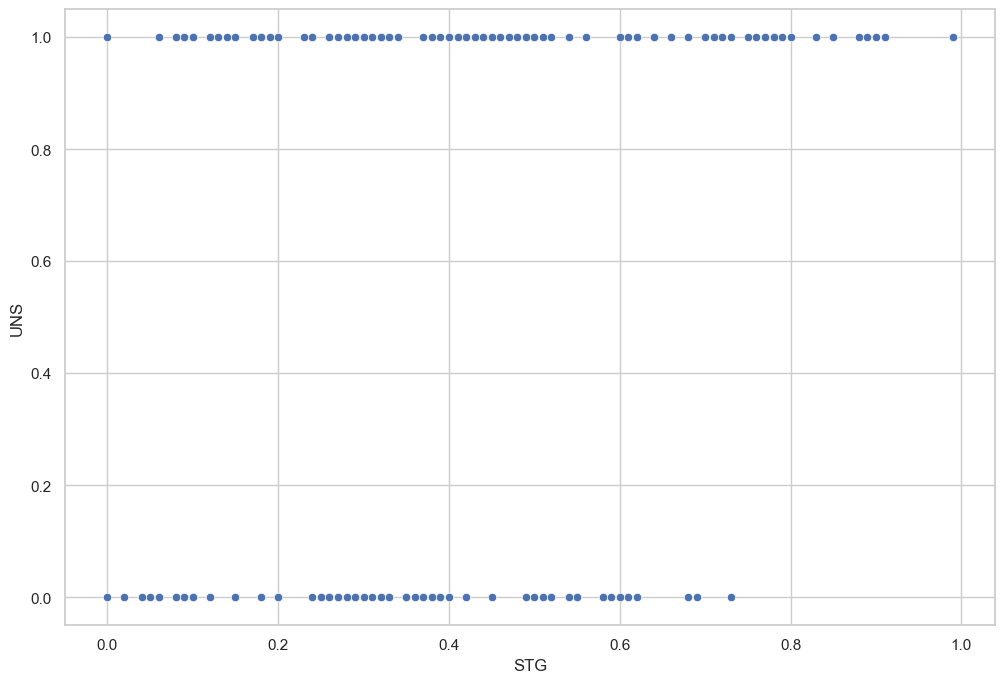

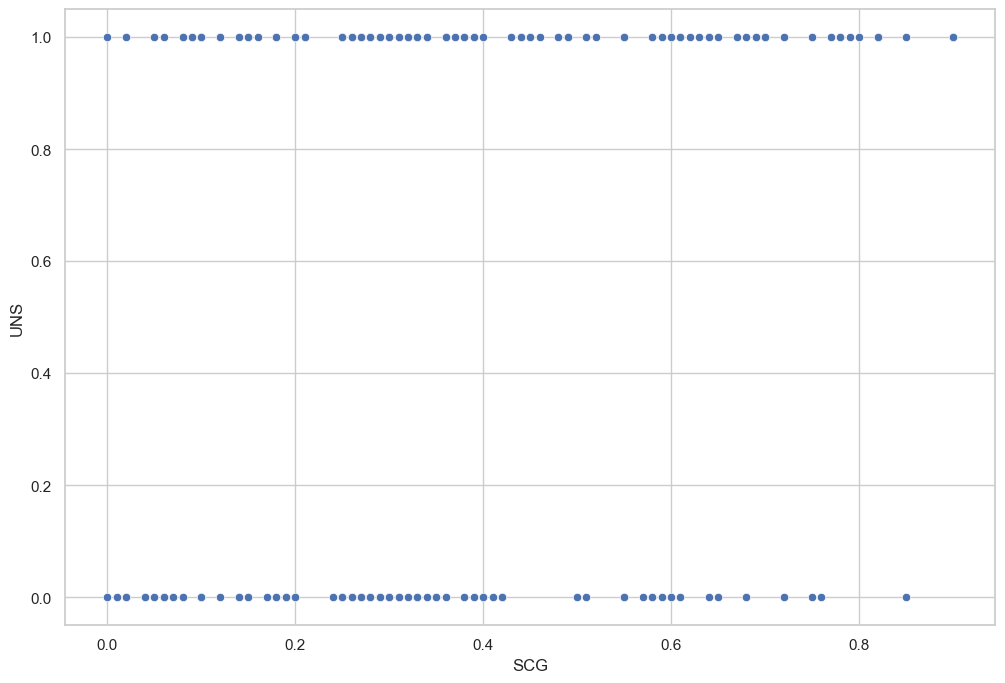

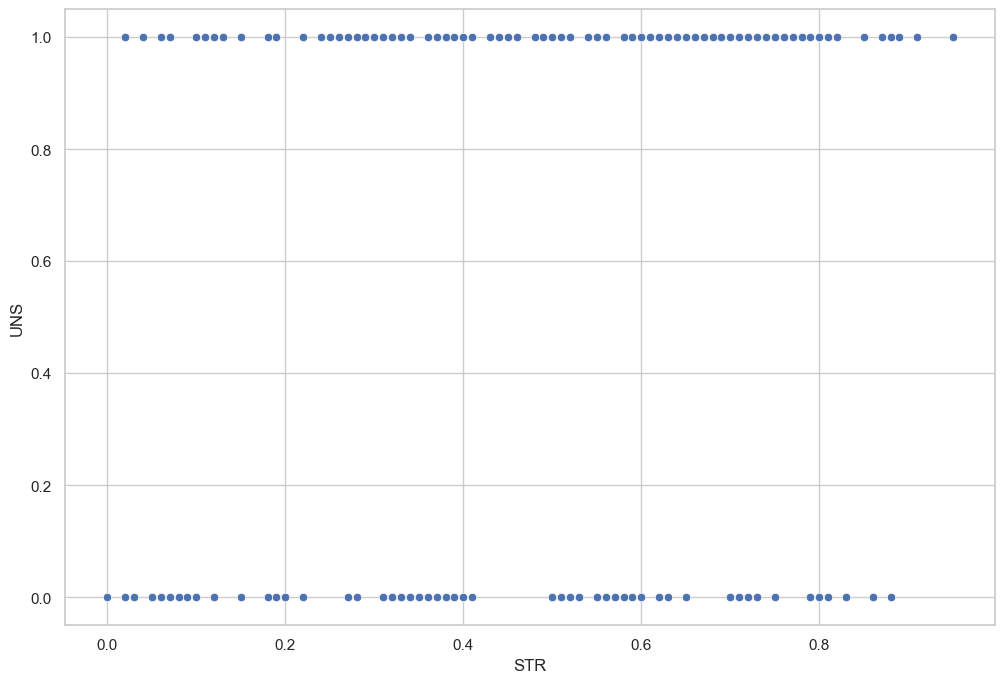

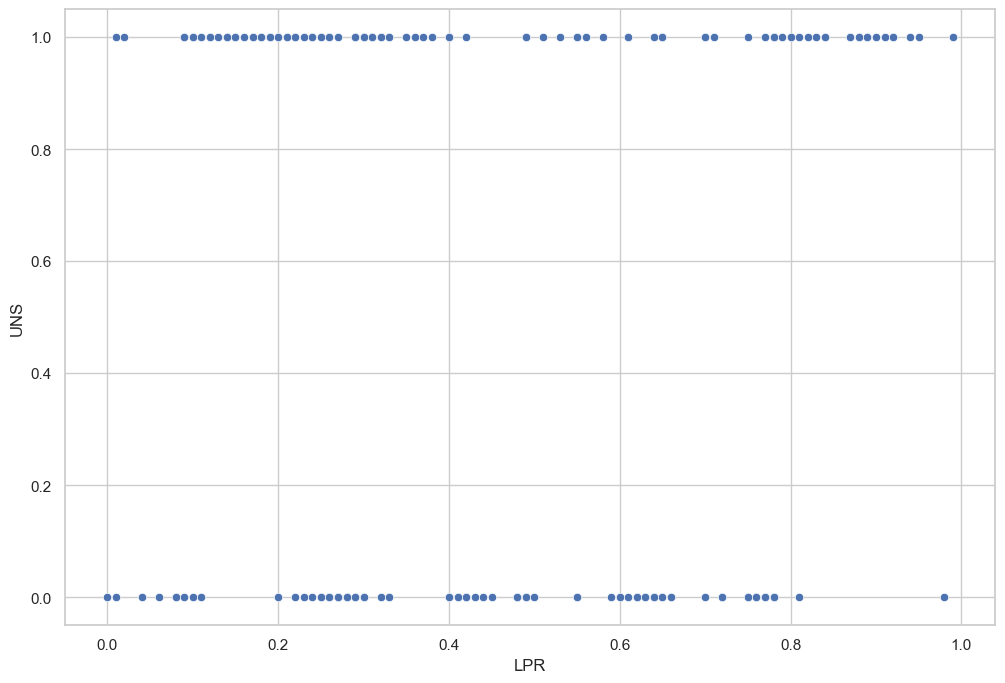

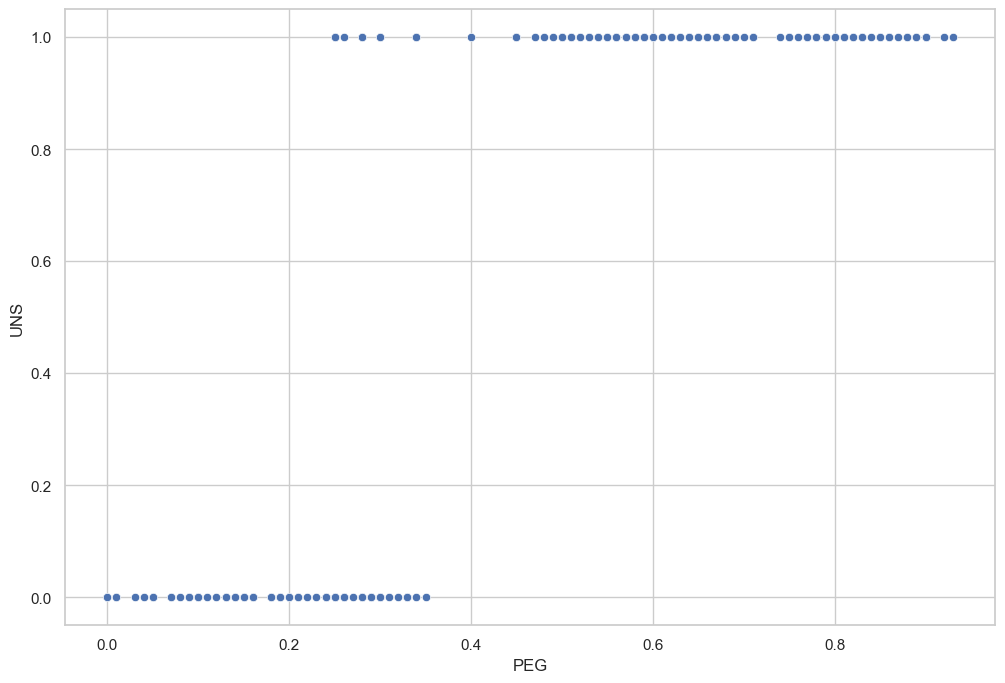

In [14]:
import seaborn as sns

for col in X.columns:
    sns.scatterplot(df, y=y, x=col)
    plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Однозначно сплит нужно проводить по признаку PEG.
По кривой видно что его лучший Gini сильно превосходит Gini остальных признаков
Это же видно на scatter-графиках: ни один признак нельзя поделить +- приемлимо, а PEG делит таргеты почти идеально при пороге чуть меньше 0.4
Хорошие кривые выглядят как холм, на вершине которого Gini максимален
Плохие кривые выглядят как плато, по ним делить особого смысла нет

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

### dashagarov@edu.hse.ru
### Посылка: https://contest.yandex.ru/contest/43413/run-report/76087742/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [15]:
import pandas as pd

df = pd.read_csv('agaricus-lepiota.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [17]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
X.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4243)
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
2898,5,0,3,1,5,1,0,0,5,1,...,2,7,7,0,2,1,4,3,5,0
4458,5,3,9,0,2,1,0,0,3,0,...,1,0,4,0,2,1,2,1,5,1
3569,2,0,2,1,5,1,0,0,10,1,...,2,6,3,0,2,1,4,3,5,0
4814,3,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
7113,3,2,4,0,2,1,0,1,0,1,...,1,7,6,0,2,1,0,7,4,4


In [19]:
X_train.shape

(4062, 22)

In [20]:
feature_types = ['categorical'] * len(X_train.columns)

In [21]:
from hw5code import DecisionTree

clf = DecisionTree(feature_types)

In [22]:
clf.fit(X_train.values, y_train.values)

In [23]:
y_pred = clf.predict(X_test.values)


In [24]:
accuracy_score(y_test, y_pred)

0.9992614475627769

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [25]:
datasets = []
urls = [
    'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data'
]

for url in urls:
    datasets.append(pd.read_csv(url, header=None))

In [26]:
datasets[0].head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [27]:
datasets[1].head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [28]:
datasets[2].head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [29]:
datasets[3].head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [30]:
datasets[2][2].value_counts()

2        432
3        432
4        432
5more    432
Name: 2, dtype: int64

In [31]:
datasets[2][3].value_counts()

2       576
4       576
more    576
Name: 3, dtype: int64

In [32]:
datasets[3][3].value_counts()

1       3240
2       3240
3       3240
more    3240
Name: 3, dtype: int64

Все признаки во всех датасетах категориальные

In [33]:
datasets = [
    {
        'X': datasets[0].iloc[:, 1:],
        'y': LabelEncoder().fit_transform(datasets[0].iloc[:, 0]),
    },
    {
        'X': datasets[1].iloc[:, :-1],
        'y': LabelEncoder().fit_transform(datasets[1].iloc[:, -1]),
    },
    {
        'X': datasets[2].iloc[:, :6],
        'y': datasets[2].iloc[:, 6].map({'acc': 0, 'unacc': 0, 'vgood': 1, 'good': 1}),
    },
    {
        'X': datasets[3].iloc[:, :8],
        'y': datasets[3].iloc[:, 8].map(
            {'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}),
    },
]

In [34]:
datasets[3]['y'].value_counts()

1    8638
0    4322
Name: 8, dtype: int64

In [35]:
for ds in datasets:
    for col in ds['X'].columns:
        ds['X'][col] = LabelEncoder().fit_transform(ds['X'][col])

In [36]:
datasets[1]['X'].head()

,0,1,2,3,4,5,6,7,8
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0


In [37]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder


def score_model(X, y):
    np.random.seed(423)
    tree_real = DecisionTree(feature_types=['real'] * X.shape[1])
    tree_cat = DecisionTree(feature_types=['categorical'] * X.shape[1])
    X_ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit_transform(X)
    tree_real_ohe = DecisionTree(feature_types=['real'] * X_ohe.shape[1])

    tree_sklearn = DecisionTreeClassifier()

    tree_real_acc = np.mean(cross_val_score(tree_real, X, y, cv=10, scoring=make_scorer(accuracy_score)))
    tree_cat_acc = np.mean(cross_val_score(tree_cat, X, y, cv=10, scoring=make_scorer(accuracy_score)))
    tree_real_ohe_acc = np.mean(cross_val_score(tree_real_ohe, X_ohe, y, cv=10, scoring=make_scorer(accuracy_score)))
    tree_sklearn_acc = np.mean(cross_val_score(tree_sklearn, X, y, cv=10, scoring=make_scorer(accuracy_score)))

    print(tree_real_acc, tree_cat_acc, tree_real_ohe_acc, tree_sklearn_acc)
    return [tree_real_acc, tree_cat_acc, tree_real_ohe_acc, tree_sklearn_acc]

In [38]:
results = pd.DataFrame(columns=['tree_real', 'tree_cat_acc', 'tree_real_ohe', 'tree_sklearn_acc'])
ds_names = ['mushrooms', 'tic-tac-toe', 'cars', 'nursery']

for ds_name, ds in zip(ds_names, datasets):
    results.loc[ds_name] = score_model(ds['X'], ds['y'])


0.9992610837438424 1.0 0.9996305418719211 0.956689025018329
0.4675328947368421 0.5425 0.5446162280701754 0.7747916666666665
0.9426468611372497 0.9675460411345611 0.919495227853206 0.9432853878209437
0.9996913580246914 0.9998456790123458 0.999537037037037 0.9996913580246914


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [46]:
def check_uniques(X):
    cols = X.columns
    for col in cols:
        print(f'{col}:')
        print(X[col].value_counts())

In [47]:
check_uniques(datasets[0]['X'])

1:
5    3656
2    3152
3     828
0     452
4      32
1       4
Name: 1, dtype: int64
2:
3    3244
2    2556
0    2320
1       4
Name: 2, dtype: int64
3:
4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: 3, dtype: int64
4:
0    4748
1    3376
Name: 4, dtype: int64
5:
5    3528
2    2160
8     576
7     576
0     400
3     400
6     256
1     192
4      36
Name: 5, dtype: int64
6:
1    7914
0     210
Name: 6, dtype: int64
7:
0    6812
1    1312
Name: 7, dtype: int64
8:
0    5612
1    2512
Name: 8, dtype: int64
9:
0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: 9, dtype: int64
10:
1    4608
0    3516
Name: 10, dtype: int64
11:
1    3776
0    2480
3    1120
2     556
4     192
Name: 11, dtype: int64
12:
2    5176
1    2372
0     552
3      24
Name: 12, dtype: int64
13:
2    4936
1    2304
0     600
3     284
Name: 13, dtype: int64
14:
7    4464
6

In [50]:
check_uniques(datasets[1]['X'])

0:
2    418
1    335
0    205
Name: 0, dtype: int64
1:
2    378
1    330
0    250
Name: 1, dtype: int64
2:
2    418
1    335
0    205
Name: 2, dtype: int64
3:
2    378
1    330
0    250
Name: 3, dtype: int64
4:
2    458
1    340
0    160
Name: 4, dtype: int64
5:
2    378
1    330
0    250
Name: 5, dtype: int64
6:
2    418
1    335
0    205
Name: 6, dtype: int64
7:
2    378
1    330
0    250
Name: 7, dtype: int64
8:
2    418
1    335
0    205
Name: 8, dtype: int64


In [51]:
check_uniques(datasets[2]['X'])

0:
3    432
0    432
2    432
1    432
Name: 0, dtype: int64
1:
3    432
0    432
2    432
1    432
Name: 1, dtype: int64
2:
0    432
1    432
2    432
3    432
Name: 2, dtype: int64
3:
0    576
1    576
2    576
Name: 3, dtype: int64
4:
2    576
1    576
0    576
Name: 4, dtype: int64
5:
1    576
2    576
0    576
Name: 5, dtype: int64


In [52]:
check_uniques(datasets[3]['X'])

0:
2    4320
1    4320
0    4320
Name: 0, dtype: int64
1:
3    2592
2    2592
1    2592
0    2592
4    2592
Name: 1, dtype: int64
2:
0    3240
1    3240
3    3240
2    3240
Name: 2, dtype: int64
3:
0    3240
1    3240
2    3240
3    3240
Name: 3, dtype: int64
4:
0    4320
2    4320
1    4320
Name: 4, dtype: int64
5:
0    6480
1    6480
Name: 5, dtype: int64
6:
0    4320
2    4320
1    4320
Name: 6, dtype: int64
7:
2    4320
1    4320
0    4320
Name: 7, dtype: int64


In [40]:
results

,tree_real,tree_cat_acc,tree_real_ohe,tree_sklearn_acc
mushrooms,0.999261,1.000000,0.999631,0.956689
tic-tac-toe,0.467533,0.542500,0.544616,0.774792
cars,0.942647,0.967546,0.919495,0.943285
nursery,0.999691,0.999846,0.999537,0.999691


In [52]:
for idx, row in results.iterrows():
    row_dict = row.to_dict()
    sorted_row = {k: v for k, v in sorted(row_dict.items(), key=lambda item: item[1])}
    print(idx, ':' , list(sorted_row.keys()))

mushrooms : ['tree_sklearn_acc', 'tree_real', 'tree_real_ohe', 'tree_cat_acc']
tic-tac-toe : ['tree_real', 'tree_cat_acc', 'tree_real_ohe', 'tree_sklearn_acc']
cars : ['tree_real_ohe', 'tree_real', 'tree_sklearn_acc', 'tree_cat_acc']
nursery : ['tree_real_ohe', 'tree_real', 'tree_sklearn_acc', 'tree_cat_acc']


**Ответ:**
Как можем заметить, для разных датасетов ранжирование алгоритмов разное, но в 3/4 побеждает наше дерево с категориальными признаками.
Это и логично - кажется, что все признаки в этих датасетах-категориальные, поэтому именно так их и надо обрабатывать.
Причем предложенный способ на этих данных работает лучше чем ohe.
На mushrooms первые три алгоритма не сильно отличаются, а вот дерево sklearn проигрывает. Возможно это связано с тем, что наше дерево слабее ограничено, нежели дерево библиотеки с дефолтными параметрами, и оно не успевает хорошо разбить выборку.
В последних двух датасетах число уникальных значений признака для каждого варианта одинаоково.
В tic-tac-toe с большим отрывом лидирует дерево из sklearn. Видимо, там используется какие-то надстройки, которые мы не реализовывали. И скорее всего они связаны с переобучением (ибо наши деревья сильно перебоучаются).
В датасетах, где хоть один алгоритм имеет accuracy > 0.99, все алгоритмы справляются так же отлично.
На tic-tac-toe и cars уже не все так хорошо.
Я думаю, случайность может проявиться вот в чем (помимо самого разбиения данных на train, test): алгоритм построения-жадный. Может быть так, что первые разбиения хоть и были наилучшими, но они сильно ухудшают дальнейшие. Как стремная идея - строить несколько возможных веток. Например, разбить дерево на топ-4 возможных жадных варианта. Далее разбить их тоже на топ-4 для каждого лучших варианта. Итого 16 разбиений (с двумя шагами) и число быстро растет. Поэтому когда мы сделали второй шаг - отберем из них лучших 4 (по метрике какой-то валидационной выборки например) и продолжим построение.




Вставьте что угодно, описывающее ваши впечатления от этого задания:

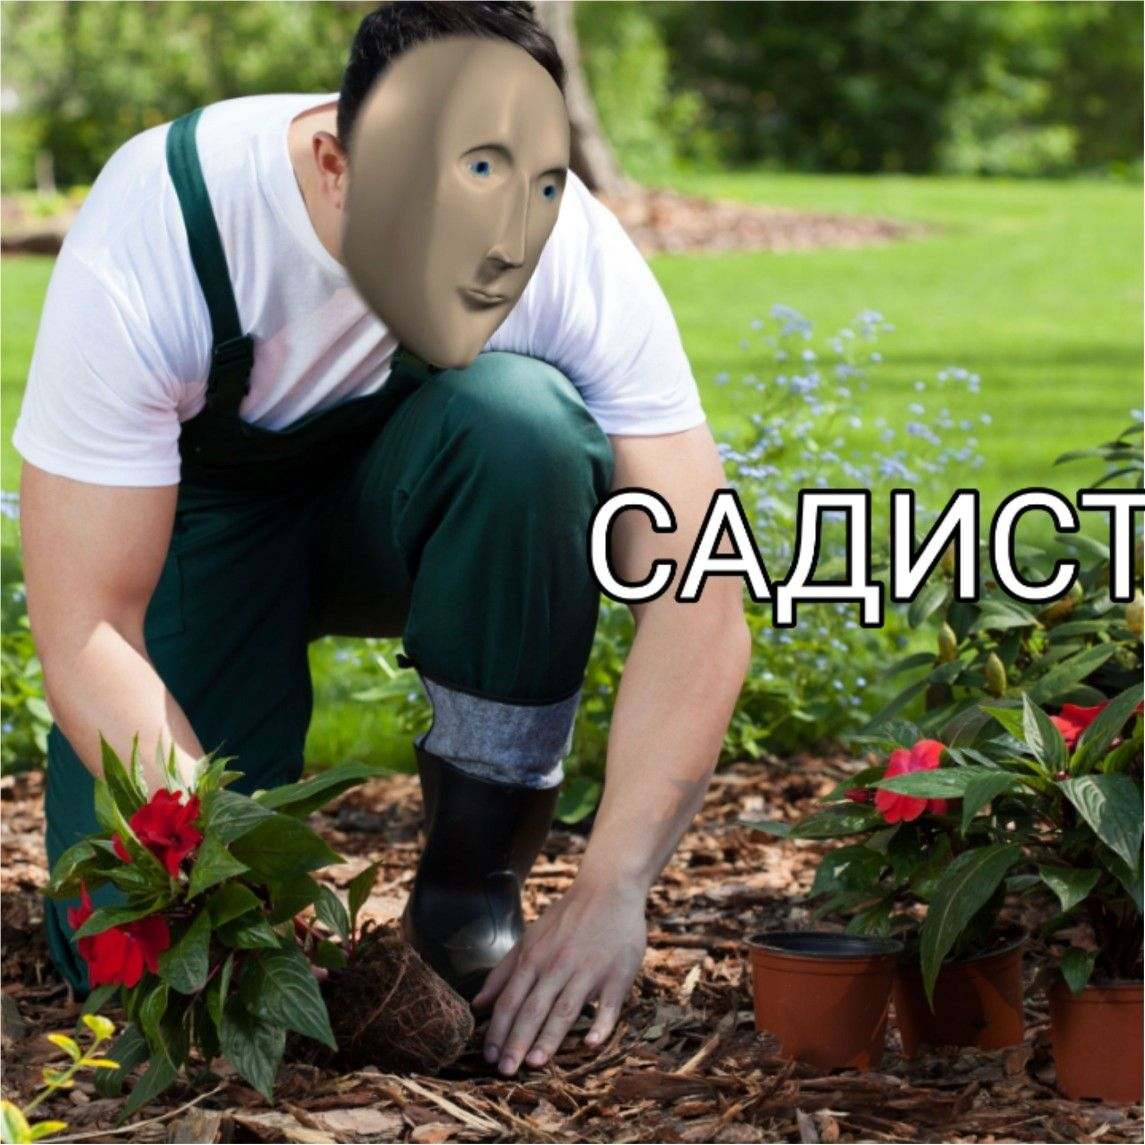

In [53]:
from IPython import display
# display.Image("pic.jpg")